In [1]:
from netCDF4 import Dataset, num2date
import numpy as np
import pandas as pd
import xarray as xr
import os
import time
import matplotlib.pyplot as plt
import matplotlib
import gc
from matplotlib import transforms
import matplotlib.colors as clrs
import glob

In [2]:
for i in np.arange(0,12):
    filename = "/home/fid000/WORK7/ANALYSIS/model_evaluation/DATA/Argo/doxy_argo_monthly_"+str(i+1)+"_CREG025.nc"
    data = Dataset(filename, "r", format="NETCDF4")
    X = data.variables['doxy_adjusted'][:]
    if i==0:
        [nz,ny,nx]=np.shape(X)
        obsO2=np.zeros((12,nz,ny,nx))
    obsO2[i,:,:,:]=X

print(type(obsO2))
print(np.shape(obsO2))


/tmp/ipykernel_79190/1783562842.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = data.variables['doxy_adjusted'][:]


<class 'numpy.ndarray'>
(12, 75, 735, 528)


In [3]:
data_file = Dataset("/gpfs/fs7/dfo/hpcmc/comda/stod000/CREG25/regions_mask_6.nc", "r", format="NETCDF4")
regindx = (data_file['regions_mask'][:])
print(regindx.shape)

data_file = Dataset("/home/fid000/WORK7/ANALYSIS/DATA/CREG025_mesh_mask.nc", "r", format="NETCDF4")
tmask = (data_file['tmask'][0,:,:,:])
print(tmask.shape)

print(np.nanmin(regindx),np.nanmean(regindx),np.nanmax(regindx))
print(np.min(tmask),np.mean(tmask),np.max(tmask))

tmask0=tmask[0,:,:].squeeze()

nxy=np.size(regindx)
I = np.reshape(regindx, (nxy,))
nreg=int(max(I))
mask = regindx
mask = mask.flatten()

(735, 528)
(75, 735, 528)
0.0 2.0095472683383417 9.0
0 0.3011297327011613 1


/tmp/ipykernel_79190/2096643997.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  regindx = (data_file['regions_mask'][:])
/tmp/ipykernel_79190/2096643997.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tmask = (data_file['tmask'][0,:,:,:])


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


0.00391176021527586


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype

nan


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


0.9899962471608036


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype

nan


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype

nan


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype

nan


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


0.5262647334749595


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


0.9303045936742195


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016c_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


0.007615935049196979


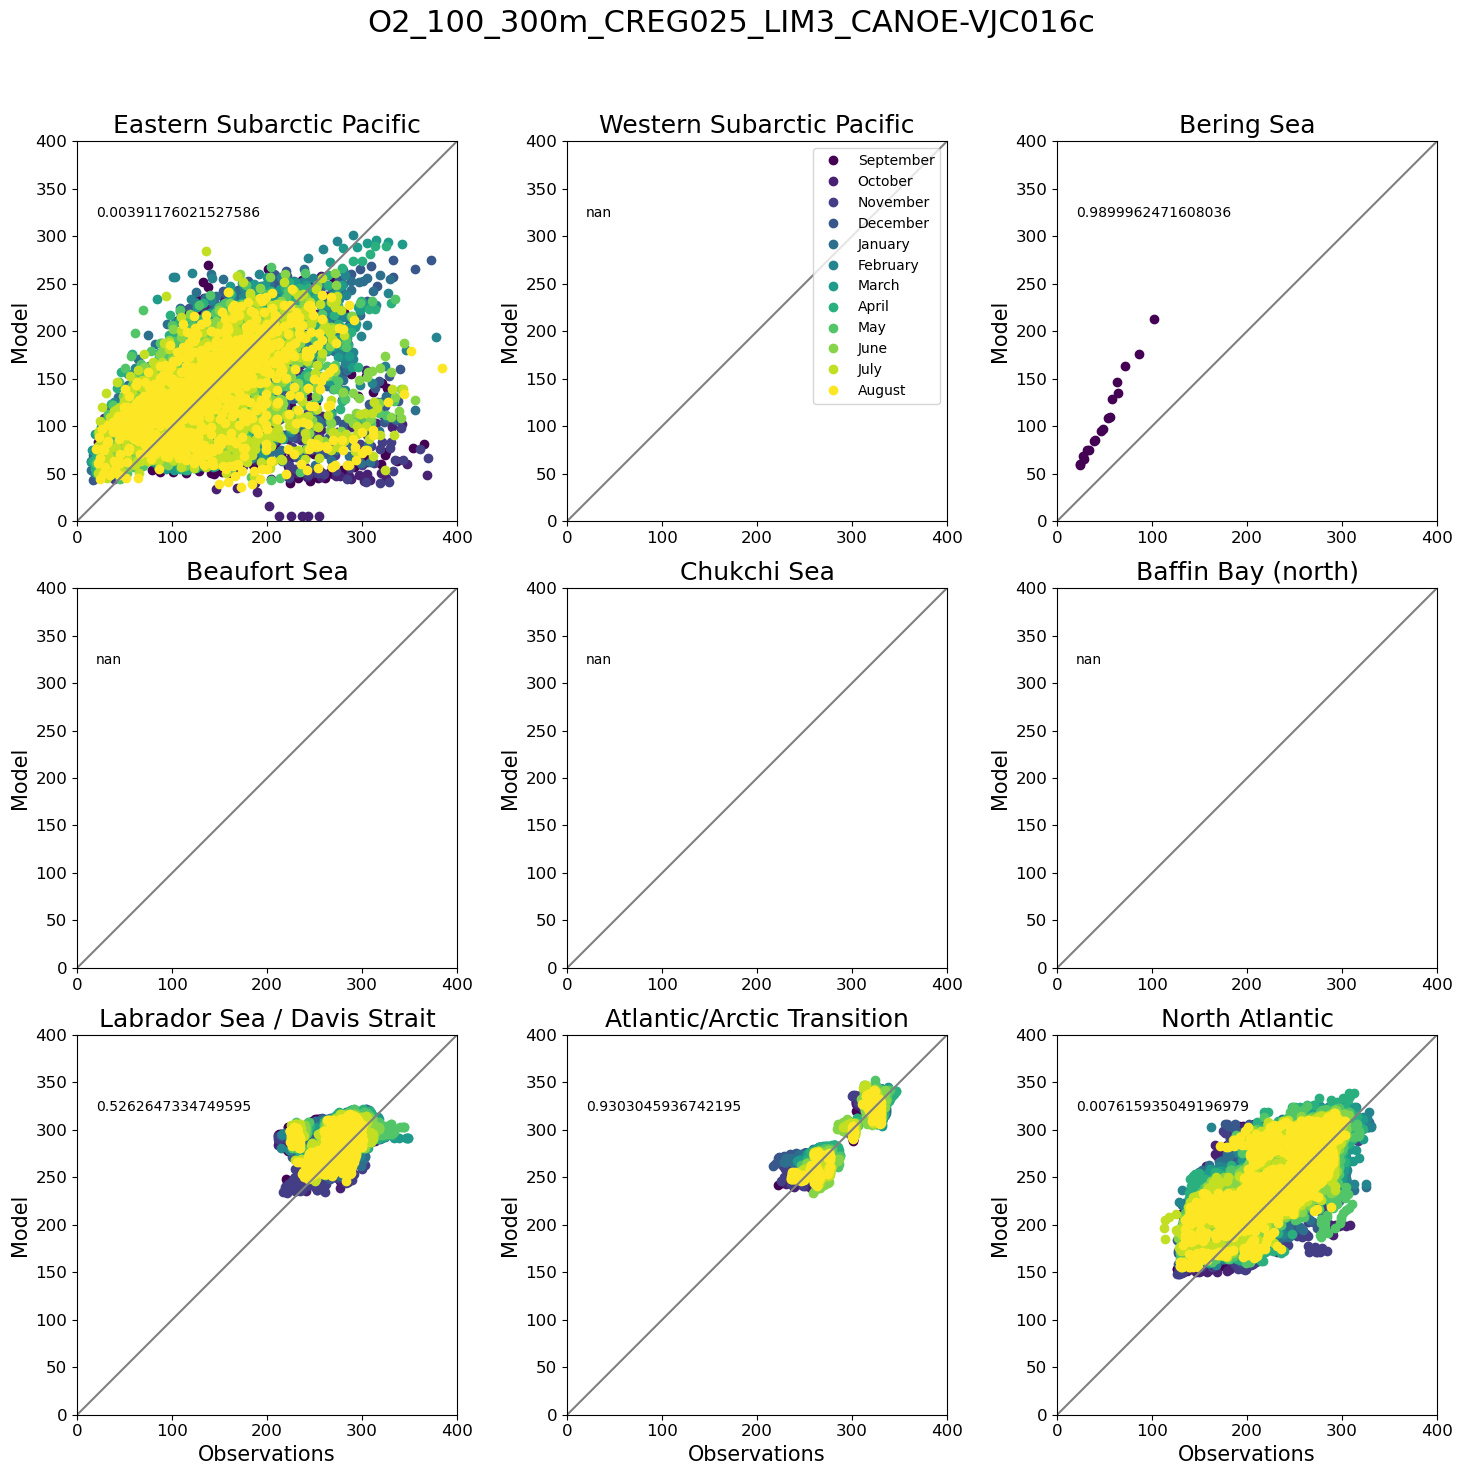

/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


0.00391176021527586


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype

nan


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


0.9898751618020959


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype

nan


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype

nan


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype

nan


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


0.5328293044601754


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


0.9294654528957063


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016d_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


0.007615935049196981


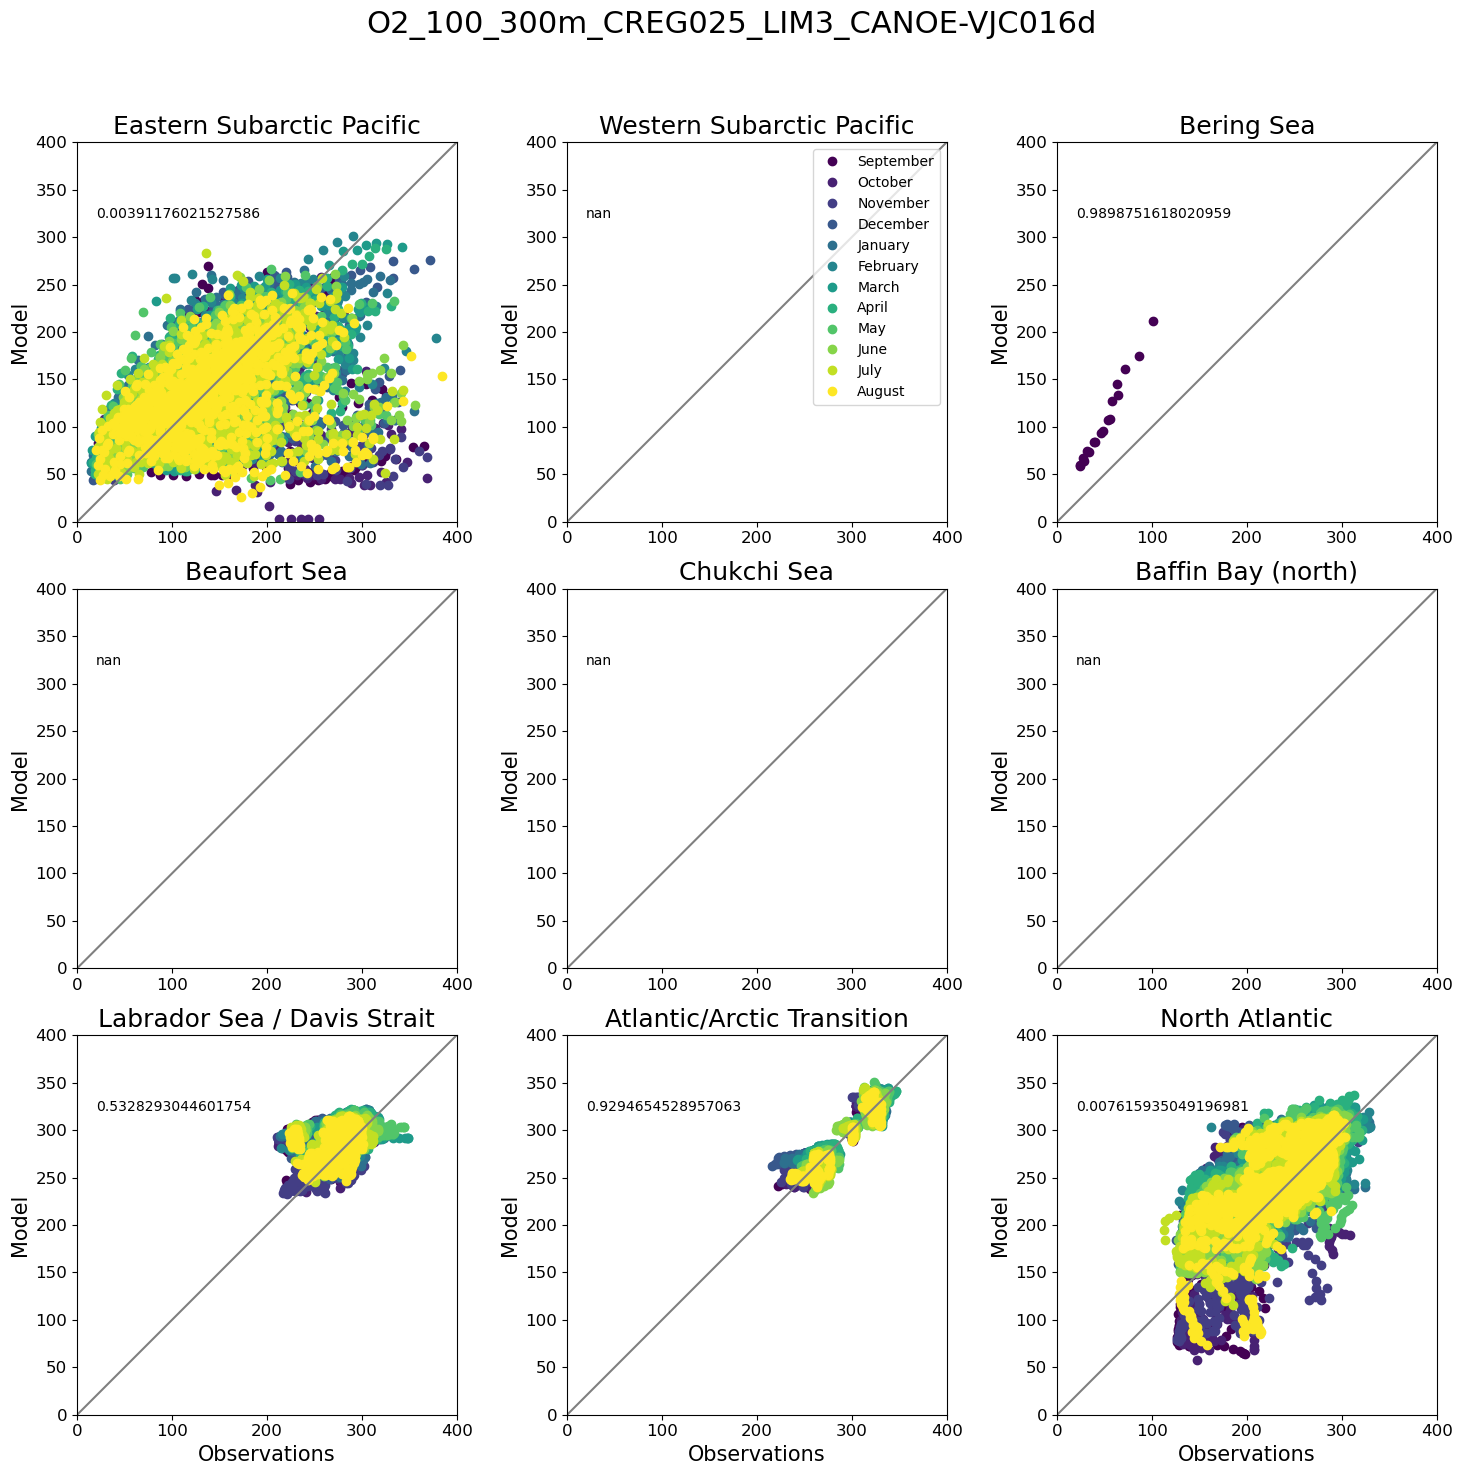

/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


0.00391176021527586


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype

nan


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


0.9888741646268969


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype

nan


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype

nan


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype

nan


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


0.5493886913253846


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


0.9273095294290676


/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]
/tmp/ipykernel_79190/3054670615.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC016e_monthly_O2.nc


/tmp/ipykernel_79190/3054670615.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


0.007615935049196981


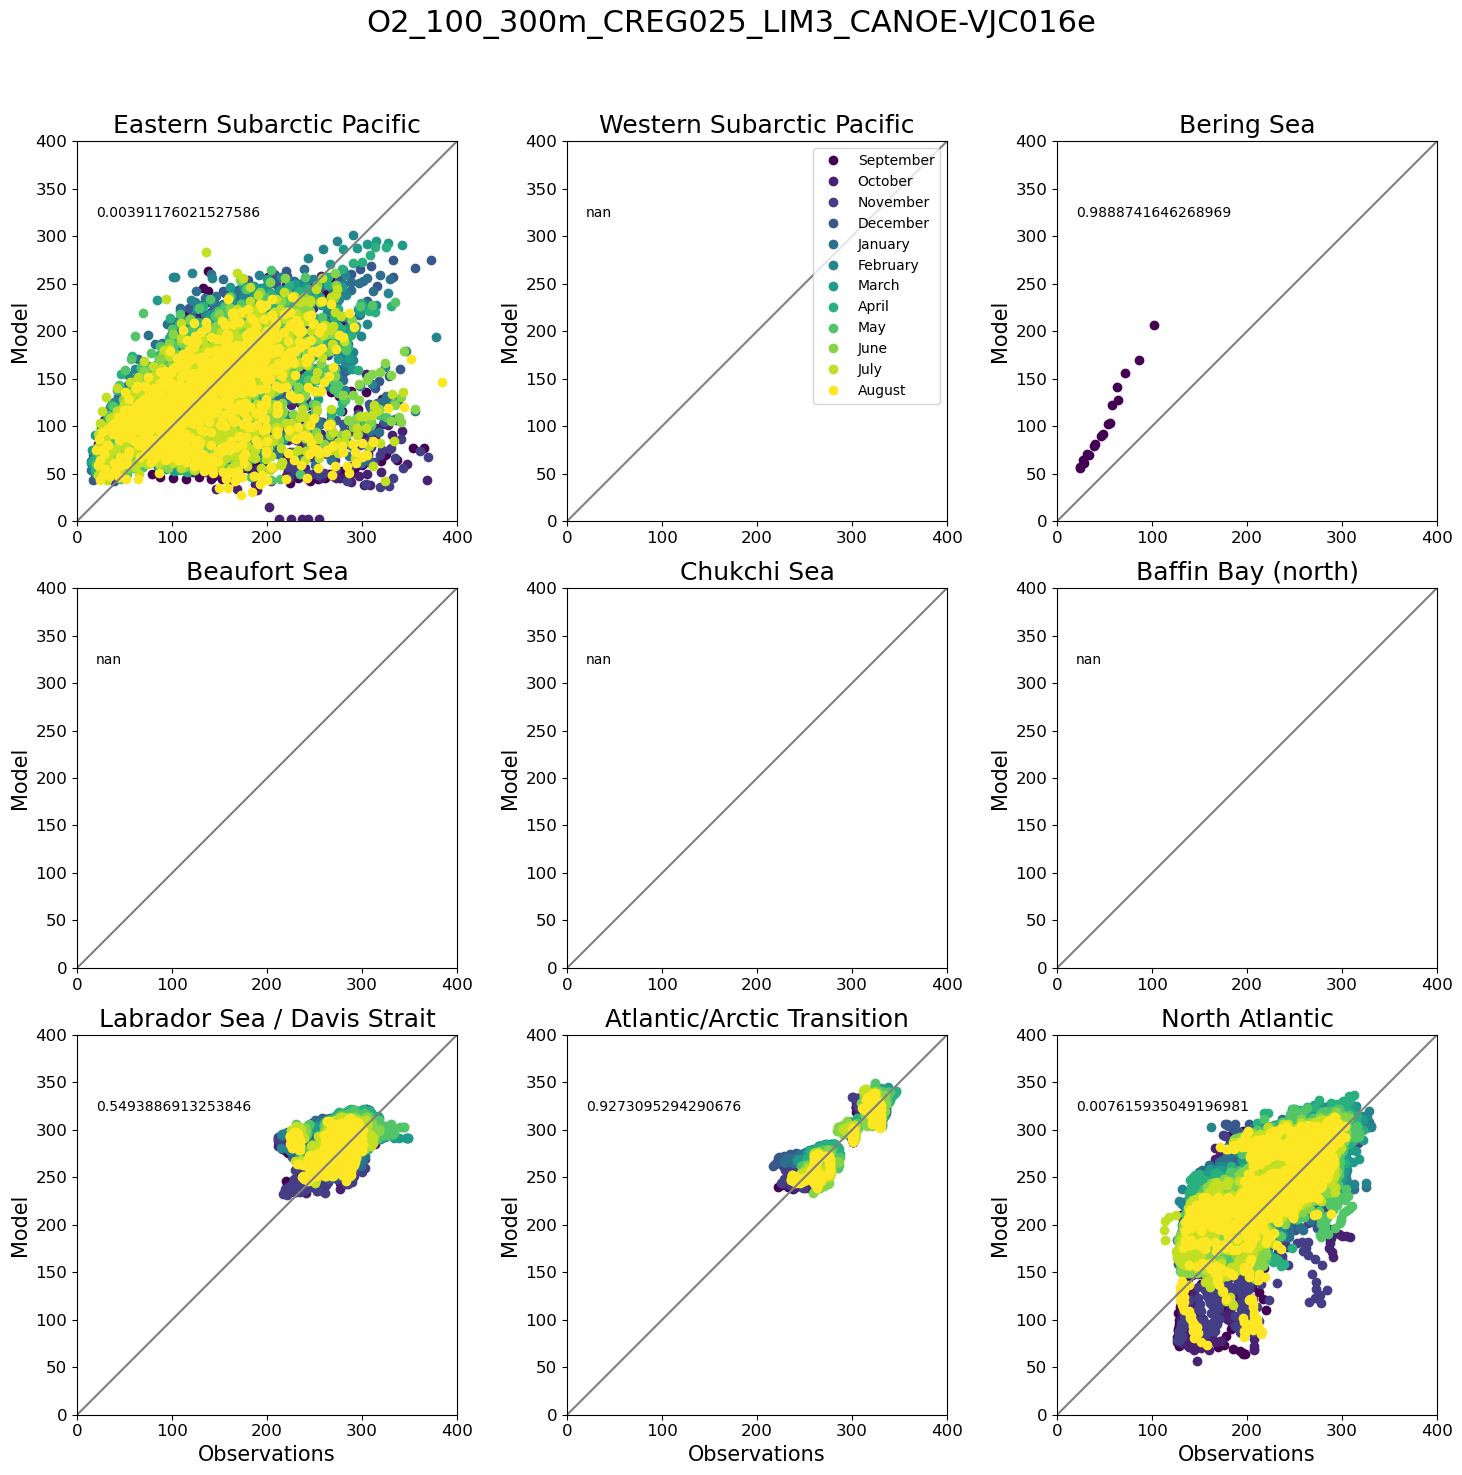

In [4]:
import itertools
fig, axes = plt.subplots(num=1, clear=True, nrows=3, ncols=3, figsize=(15, 15))
#fig.suptitle('Oxygen Concentrations: Model vs Obs, by region and month from run VJC014j', fontsize=26)

months=['September','October','November','December','January','February','March','April','May','June','July','August']
regions = ['Eastern Subarctic Pacific', 'Western Subarctic Pacific', 'Bering Sea', 'Beaufort Sea', 'Chukchi Sea', 'Baffin Bay (north)', 'Labrador Sea / Davis Strait', 'Atlantic/Arctic Transition', 'North Atlantic']
iz = np.arange(25,34) #z level 25 is 108.03m and z level 34 is 300.88m

#variants = ['a','b','c','d','e','f','g']
#variants = ['CREG025_LIM3_CANOE-VJC014l','CREG025_LIM3_CANOE-VJC014t','CREG025_LIM3_CANOE-VJC014w',
#            'CREG025_LIM3_CANOE-VJC014x','CREG025_LIM3_CANOE-VJC014m','CREG025_LIM3_CANOE-VJC014n',
#            'CREG025_LIM3_CANOE-VJC014o','CREG025_LIM3_CANOE-VJC014p','CREG025_LIM3_CANOE-VJC014y',
#            'CREG025_LIM3_CANOE-VJC014q','CREG025_LIM3_CANOE-VJC014z','CREG025_LIM3_CANOE-VJC014r',
#            'CREG025_LIM3_CANOE-VJC014s','CREG025_LIM3_CANOE-VJC014u','CREG025_LIM3_CANOE-VJC014v',
#            'CREG025_LIM3_CANOE-VJC015a','CREG025_LIM3_CANOE-VJC015b','CREG025_LIM3_CANOE-VJC015c',
#            'CREG025_LIM3_CANOE-VJC015d','CREG025_LIM3_CANOE-VJC015e','CREG025_LIM3_CANOE-VJC015f',
#            'CREG025_LIM3_CANOE-VJC015g','CREG025_LIM3_CANOE-VJC015i','CREG025_LIM3_CANOE-VJC015j',
#            'CREG025_LIM3_CANOE-VJC015k','CREG025_LIM3_CANOE-VJC015l','CREG025_LIM3_CANOE-VJCnep01']
#            'CREG025_LIM3_CANOE-VJCsed01','CREG025_LIM3_CANOE-VJCsed02']


variants = ['CREG025_LIM3_CANOE-VJC016c','CREG025_LIM3_CANOE-VJC016d','CREG025_LIM3_CANOE-VJC016e']


for asuff in variants:
    fig, axes = plt.subplots(num=1, clear=True, nrows=3, ncols=3, figsize=(15, 15))
    #runid='CREG025_LIM3_CANOE-VJC015'+asuff
    runid = str(asuff)
    data_all=np.zeros((12,nz,ny,nx))
    fig.suptitle('O2_100_300m_'+asuff, fontsize=22)
    flist = glob.glob("/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/"+runid+"_monthly_O2.nc")
    flist.sort()
    ifile = 0
    for i, c, in enumerate(regions):
        cx=plt.subplot(3,3,i+1)
        colors =itertools.cycle(plt.get_cmap('viridis')(np.linspace(0,1, 12))) # potential pallettes: hsv, jet, gnuplot
        
        for im in np.arange(9,12):
            if im >= 0:
                filein = flist[ifile]
                data = Dataset(filein, "r", format="NETCDF4")
                modO2 = data.variables['O2'][:]
                tmaskz=tmask[iz,:,:].flatten()   
                ZZ=(np.zeros((nz,ny,nx))+regindx).flatten()    # broadcast regions map into a 3D array with same data for each depth

                XOBS=obsO2[im,iz,:,:].squeeze().flatten()
                XMOD=modO2[im,iz,:,:].squeeze().flatten()
                ii=np.where( ~np.isnan(XOBS) )[0]
                XOBS=XOBS[ii]; XMOD=XMOD[ii]; ZZ=ZZ[ii]; tmaskz=tmaskz[ii];

                jj=np.where( (XOBS>0.) & (ZZ==(i+1)) & (tmaskz==1) )[0]
                colour = next(colors) 
                plt.plot(XOBS[jj], XMOD[jj], "o", color=colour, markeredgecolor=colour, label=im)
            if i > 5:
                plt.xlabel("Observations", fontsize=15)
            plt.ylabel("Model", fontsize=15)
            plt.title(c, fontsize=18)
            #plt.axis('square')
            cx.tick_params(axis='both', labelsize=12)
            cx.set_aspect(1./cx.get_data_ratio())
        for im in np.arange(0,9):
            if im >= 0:
                filein = flist[ifile]
                print(filein)
                data = Dataset(filein, "r", format="NETCDF4")
                modO2 = data.variables['O2'][:]
                tmaskz=tmask[iz,:,:].flatten()   
                ZZ=(np.zeros((nz,ny,nx))+regindx).flatten()    # broadcast regions map into a 3D array with same data for each depth

                XOBS=obsO2[im,iz,:,:].squeeze().flatten()
                XMOD=modO2[im,iz,:,:].squeeze().flatten()
                ii=np.where( ~np.isnan(XOBS) )[0]
                XOBS=XOBS[ii]; XMOD=XMOD[ii]; ZZ=ZZ[ii]; tmaskz=tmaskz[ii];

                jj=np.where( (XOBS>0.) & (ZZ==(i+1)) & (tmaskz==1) )[0]
                colour = next(colors) 
                plt.plot(XOBS[jj], XMOD[jj], "o", color=colour, markeredgecolor=colour, label=im)

            if i > 5:
                plt.xlabel("Observations", fontsize=15)

            plt.ylabel("Model", fontsize=15)
            plt.title(c, fontsize=18)
            plt.xlim([0, 400]); plt.ylim([0,400])
            cx.tick_params(axis='both', labelsize=12)
            cx.set_aspect(1./cx.get_data_ratio())
        
        
        XOBS=obsO2[:,iz,:,:].squeeze().flatten()
        XMOD=modO2[:,iz,:,:].squeeze().flatten()
        ZZ=(np.zeros((12,nz,ny,nx))+regindx).flatten()
        tmask12=(np.zeros((12,nz,ny,nx))+tmask0).flatten()
        ii=np.where( ~np.isnan(XOBS) )[0]
        
        XOBS=XOBS[ii]; XMOD=XMOD[ii]; ZZ=ZZ[ii]; tmask12=tmask12[ii];
        jj=np.where( (XOBS>0.) & (ZZ==(i+1)) & (tmask12==1) )[0]
        
        r = np.corrcoef(XOBS[jj],XMOD[jj]); r = r[0,1]; '{:.2f}'.format(r); r = str(r); print(r)
        
        plt.text(.05, .8, s = r, transform=cx.transAxes, fontsize='medium')
        
        cx.plot([0, 1], [0, 1], color='grey', transform=cx.transAxes)
        if i == 1:
            plt.legend(labels=['September','October','November','December','January','February','March','April','May','June','July','August'],
                       fontsize='medium')
    
    plt.tight_layout(rect=(0,0,1,0.95), w_pad=0)
    plt.show()
    fig.savefig("/home/fid000/WORK7/ANALYSIS/model_evaluation/FIGURES/Books/O2_Deep/O2_100_300m_"+runid)
    #plt.close(fig)    

CREG025_LIM3_CANOE-VJC014l
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc']
0


/tmp/ipykernel_473669/2377856940.py:47: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modO2 = data.variables['O2'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0


/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
CREG025_LIM3_CANOE-VJC014w
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014w_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
CREG025_LIM3_CANOE-VJC014u
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
CREG025_LIM3_CANOE-VJC015g
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
CREG025_LIM3_CANOE-VJC015oi
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015oi_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015oi_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/mode

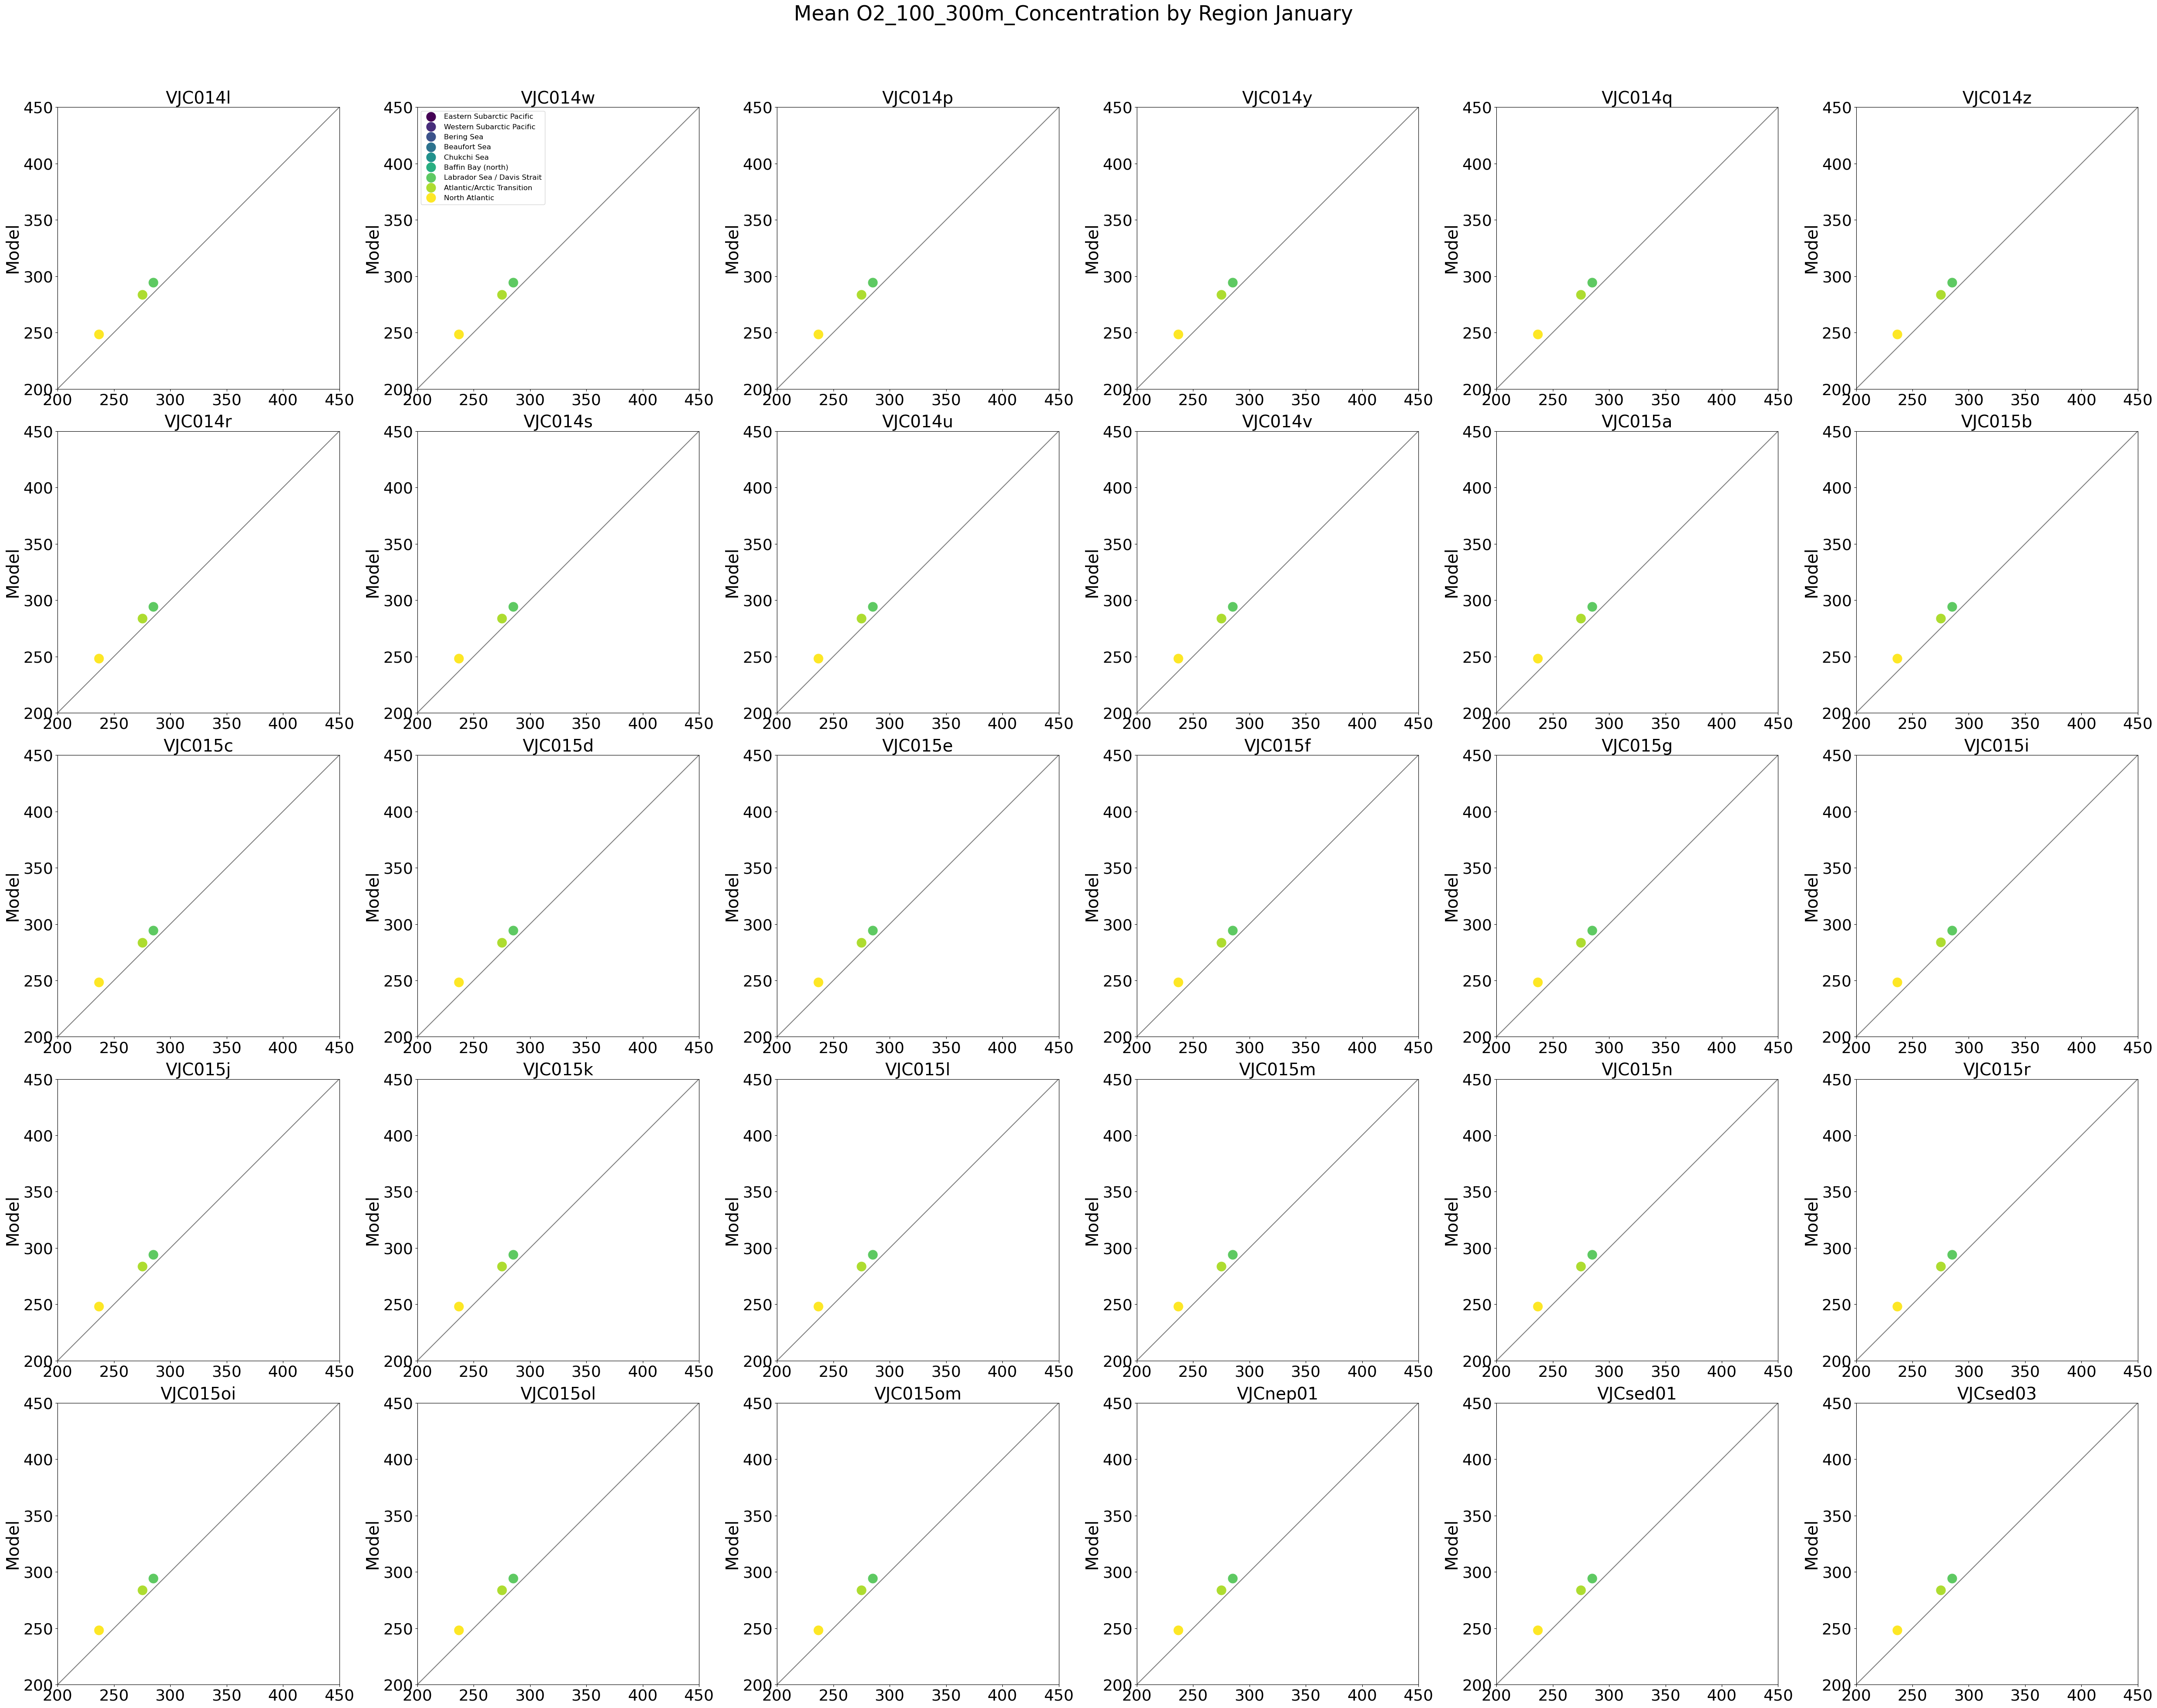

CREG025_LIM3_CANOE-VJC014l
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
CREG025_LIM3_CANOE-VJC014u
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
CREG025_LIM3_CANOE-VJC015g
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
CREG025_LIM3_CANOE-VJC015oi
['/home/fid000/WORK7/ANALYSIS/model_ev

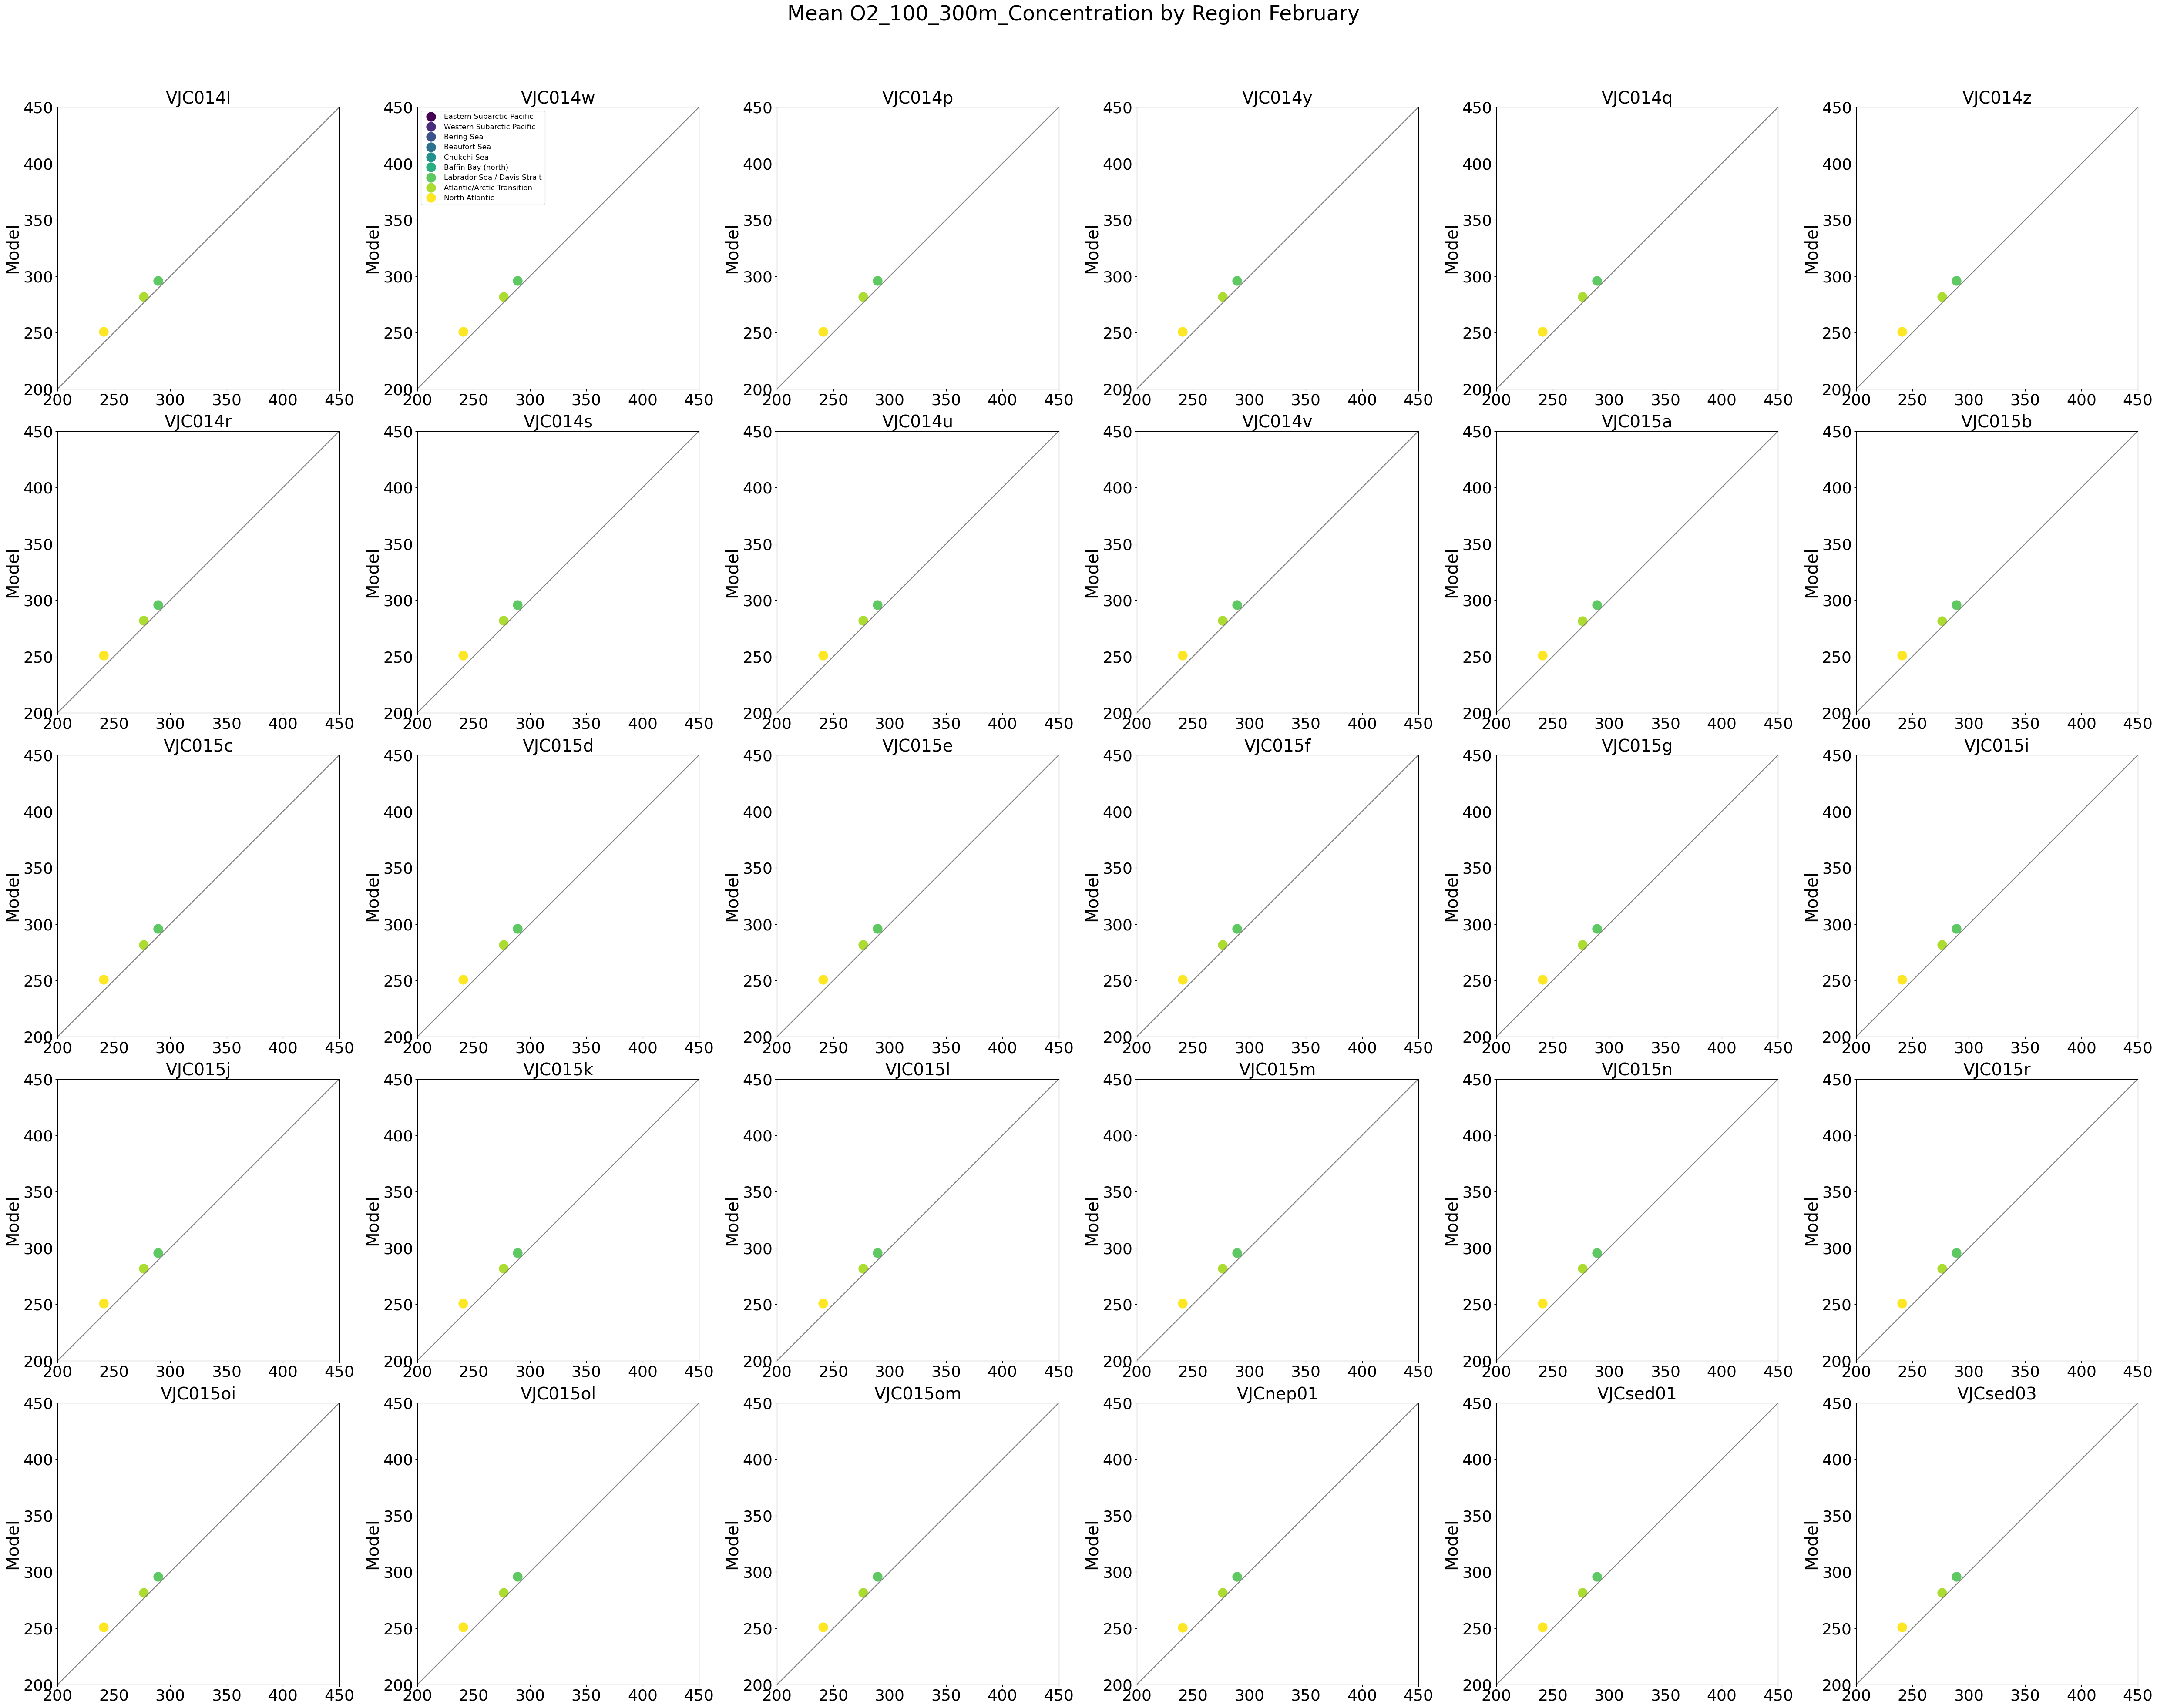

CREG025_LIM3_CANOE-VJC014l
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
CREG025_LIM3_CANOE-VJC014u
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
CREG025_LIM3_CANOE-VJC015g
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
CREG025_LIM3_CANOE-VJC015oi
['/home/fid000/WORK7/ANALYSIS/model_ev

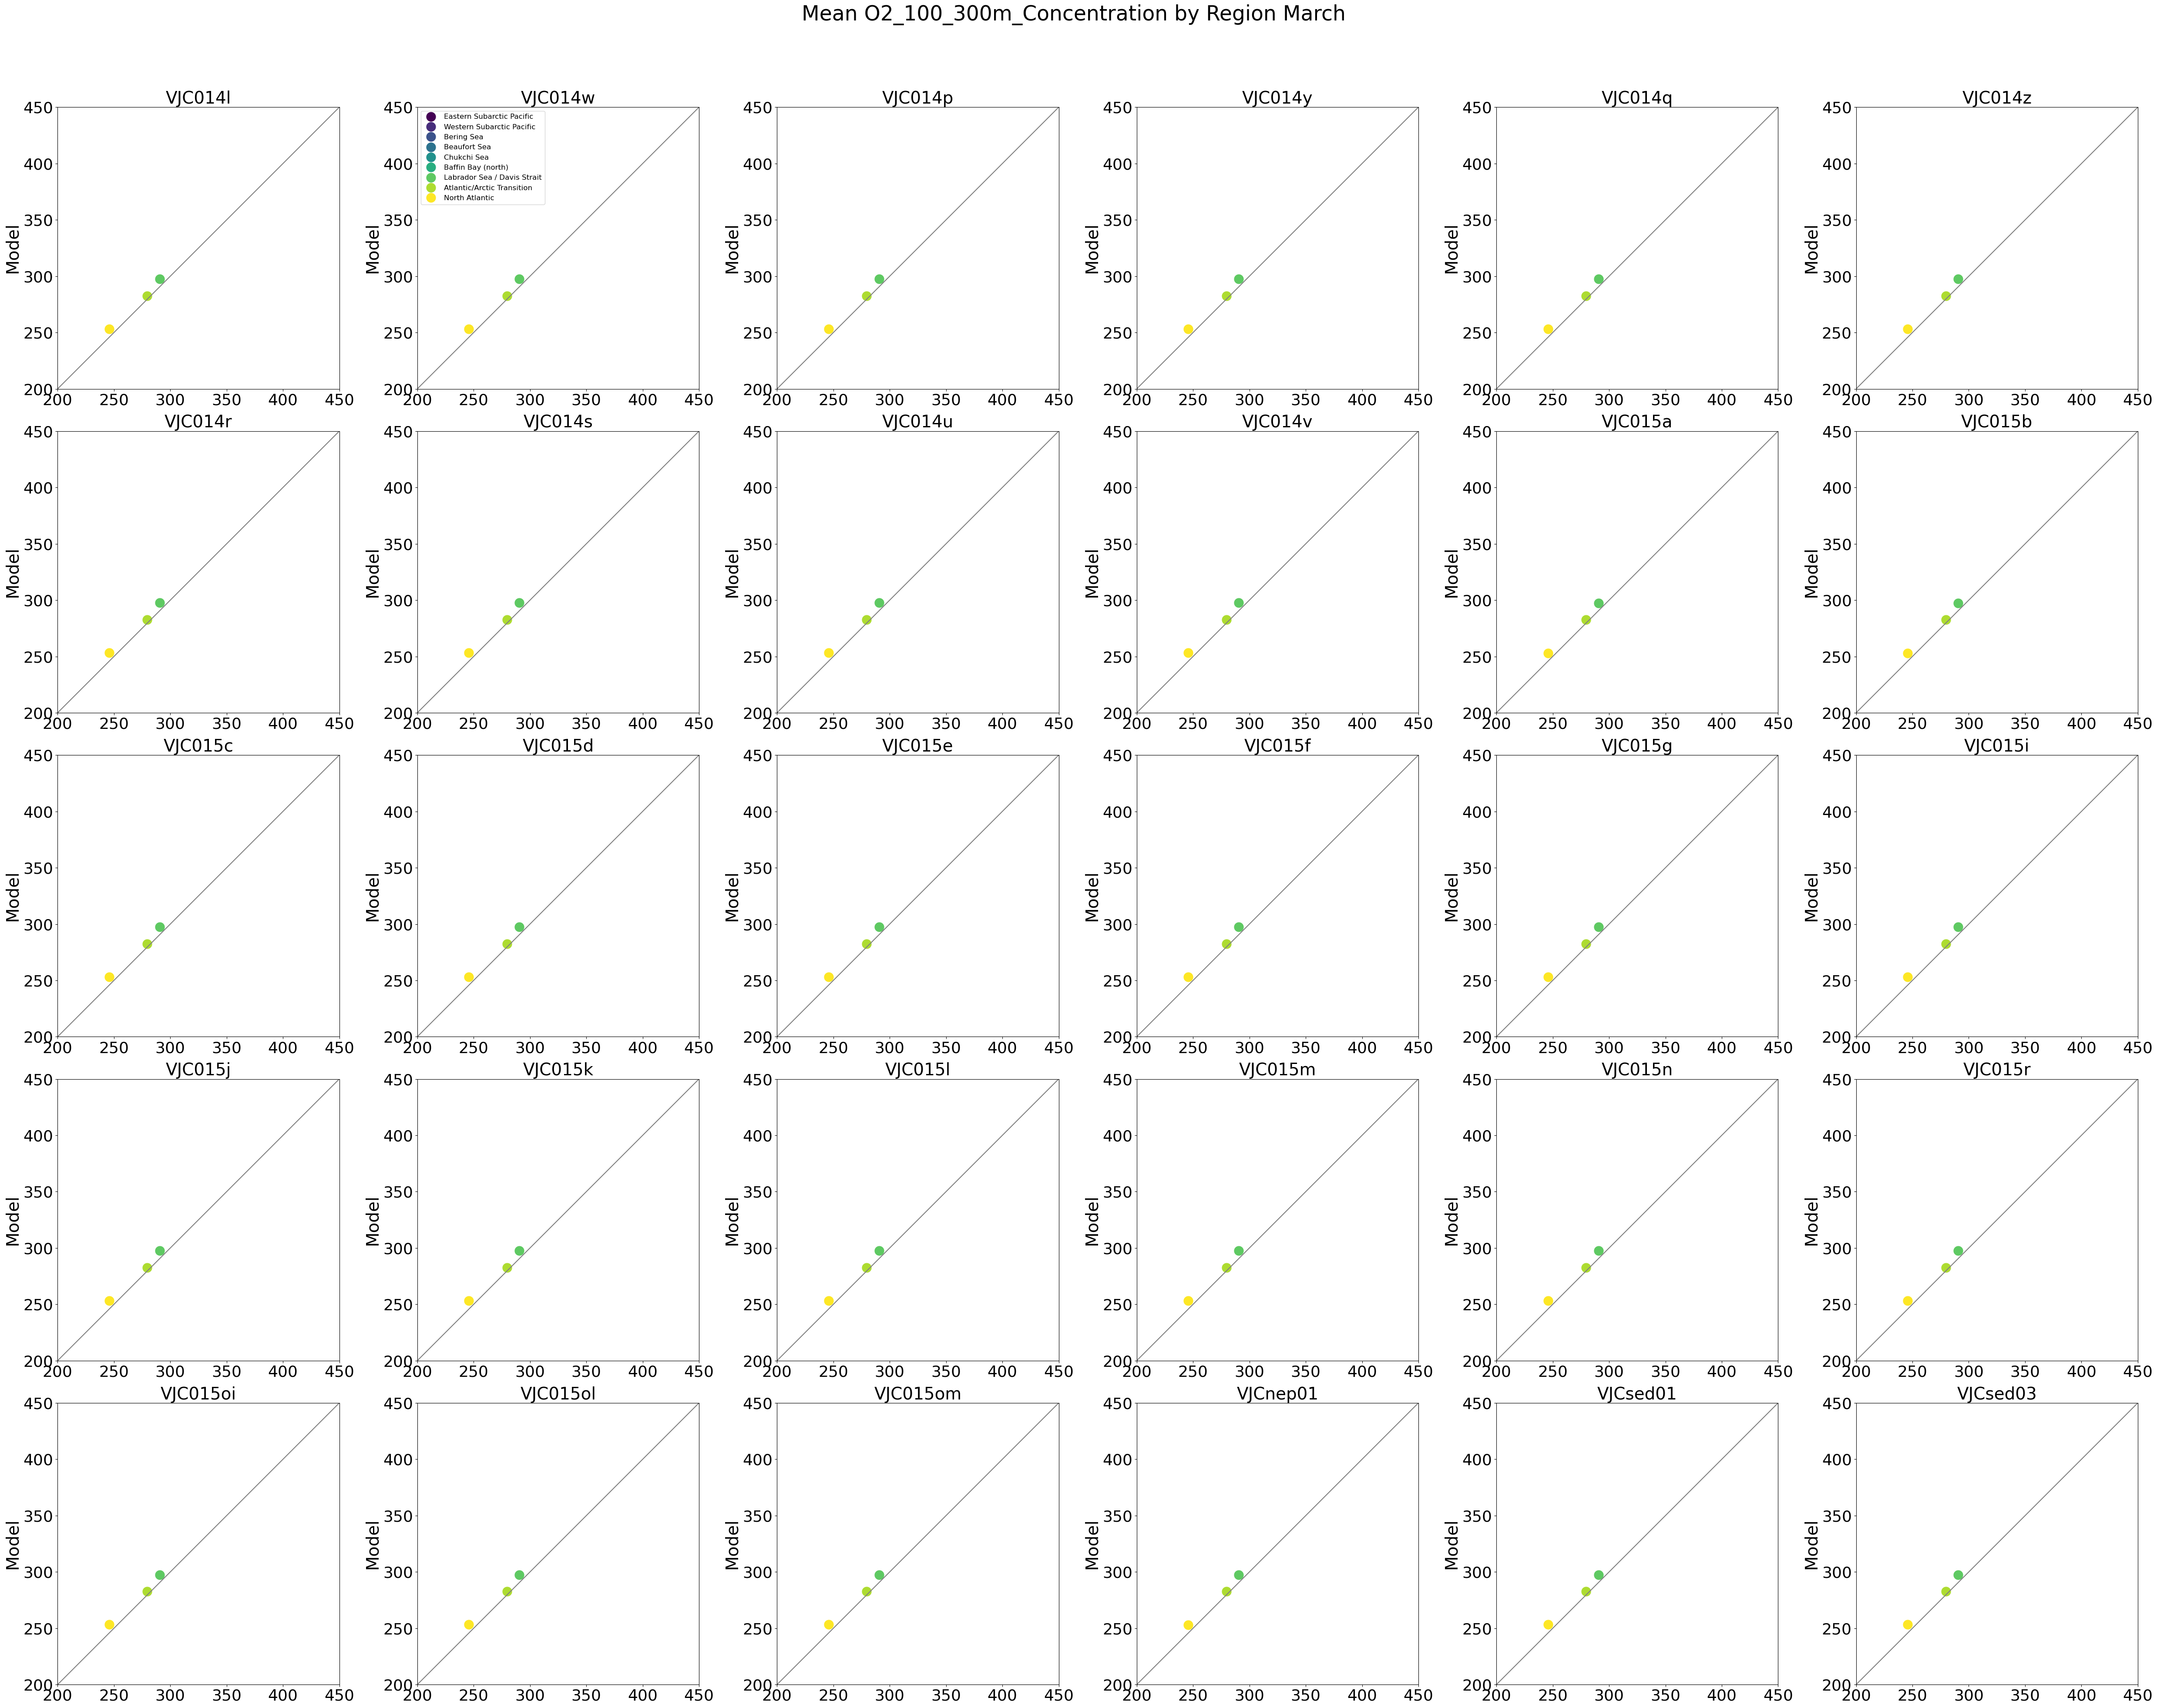

CREG025_LIM3_CANOE-VJC014l
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
CREG025_LIM3_CANOE-VJC014u
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
CREG025_LIM3_CANOE-VJC015g
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
CREG025_LIM3_CANOE-VJC015oi
['/home/fid000/WORK7/ANALYSIS/model_ev

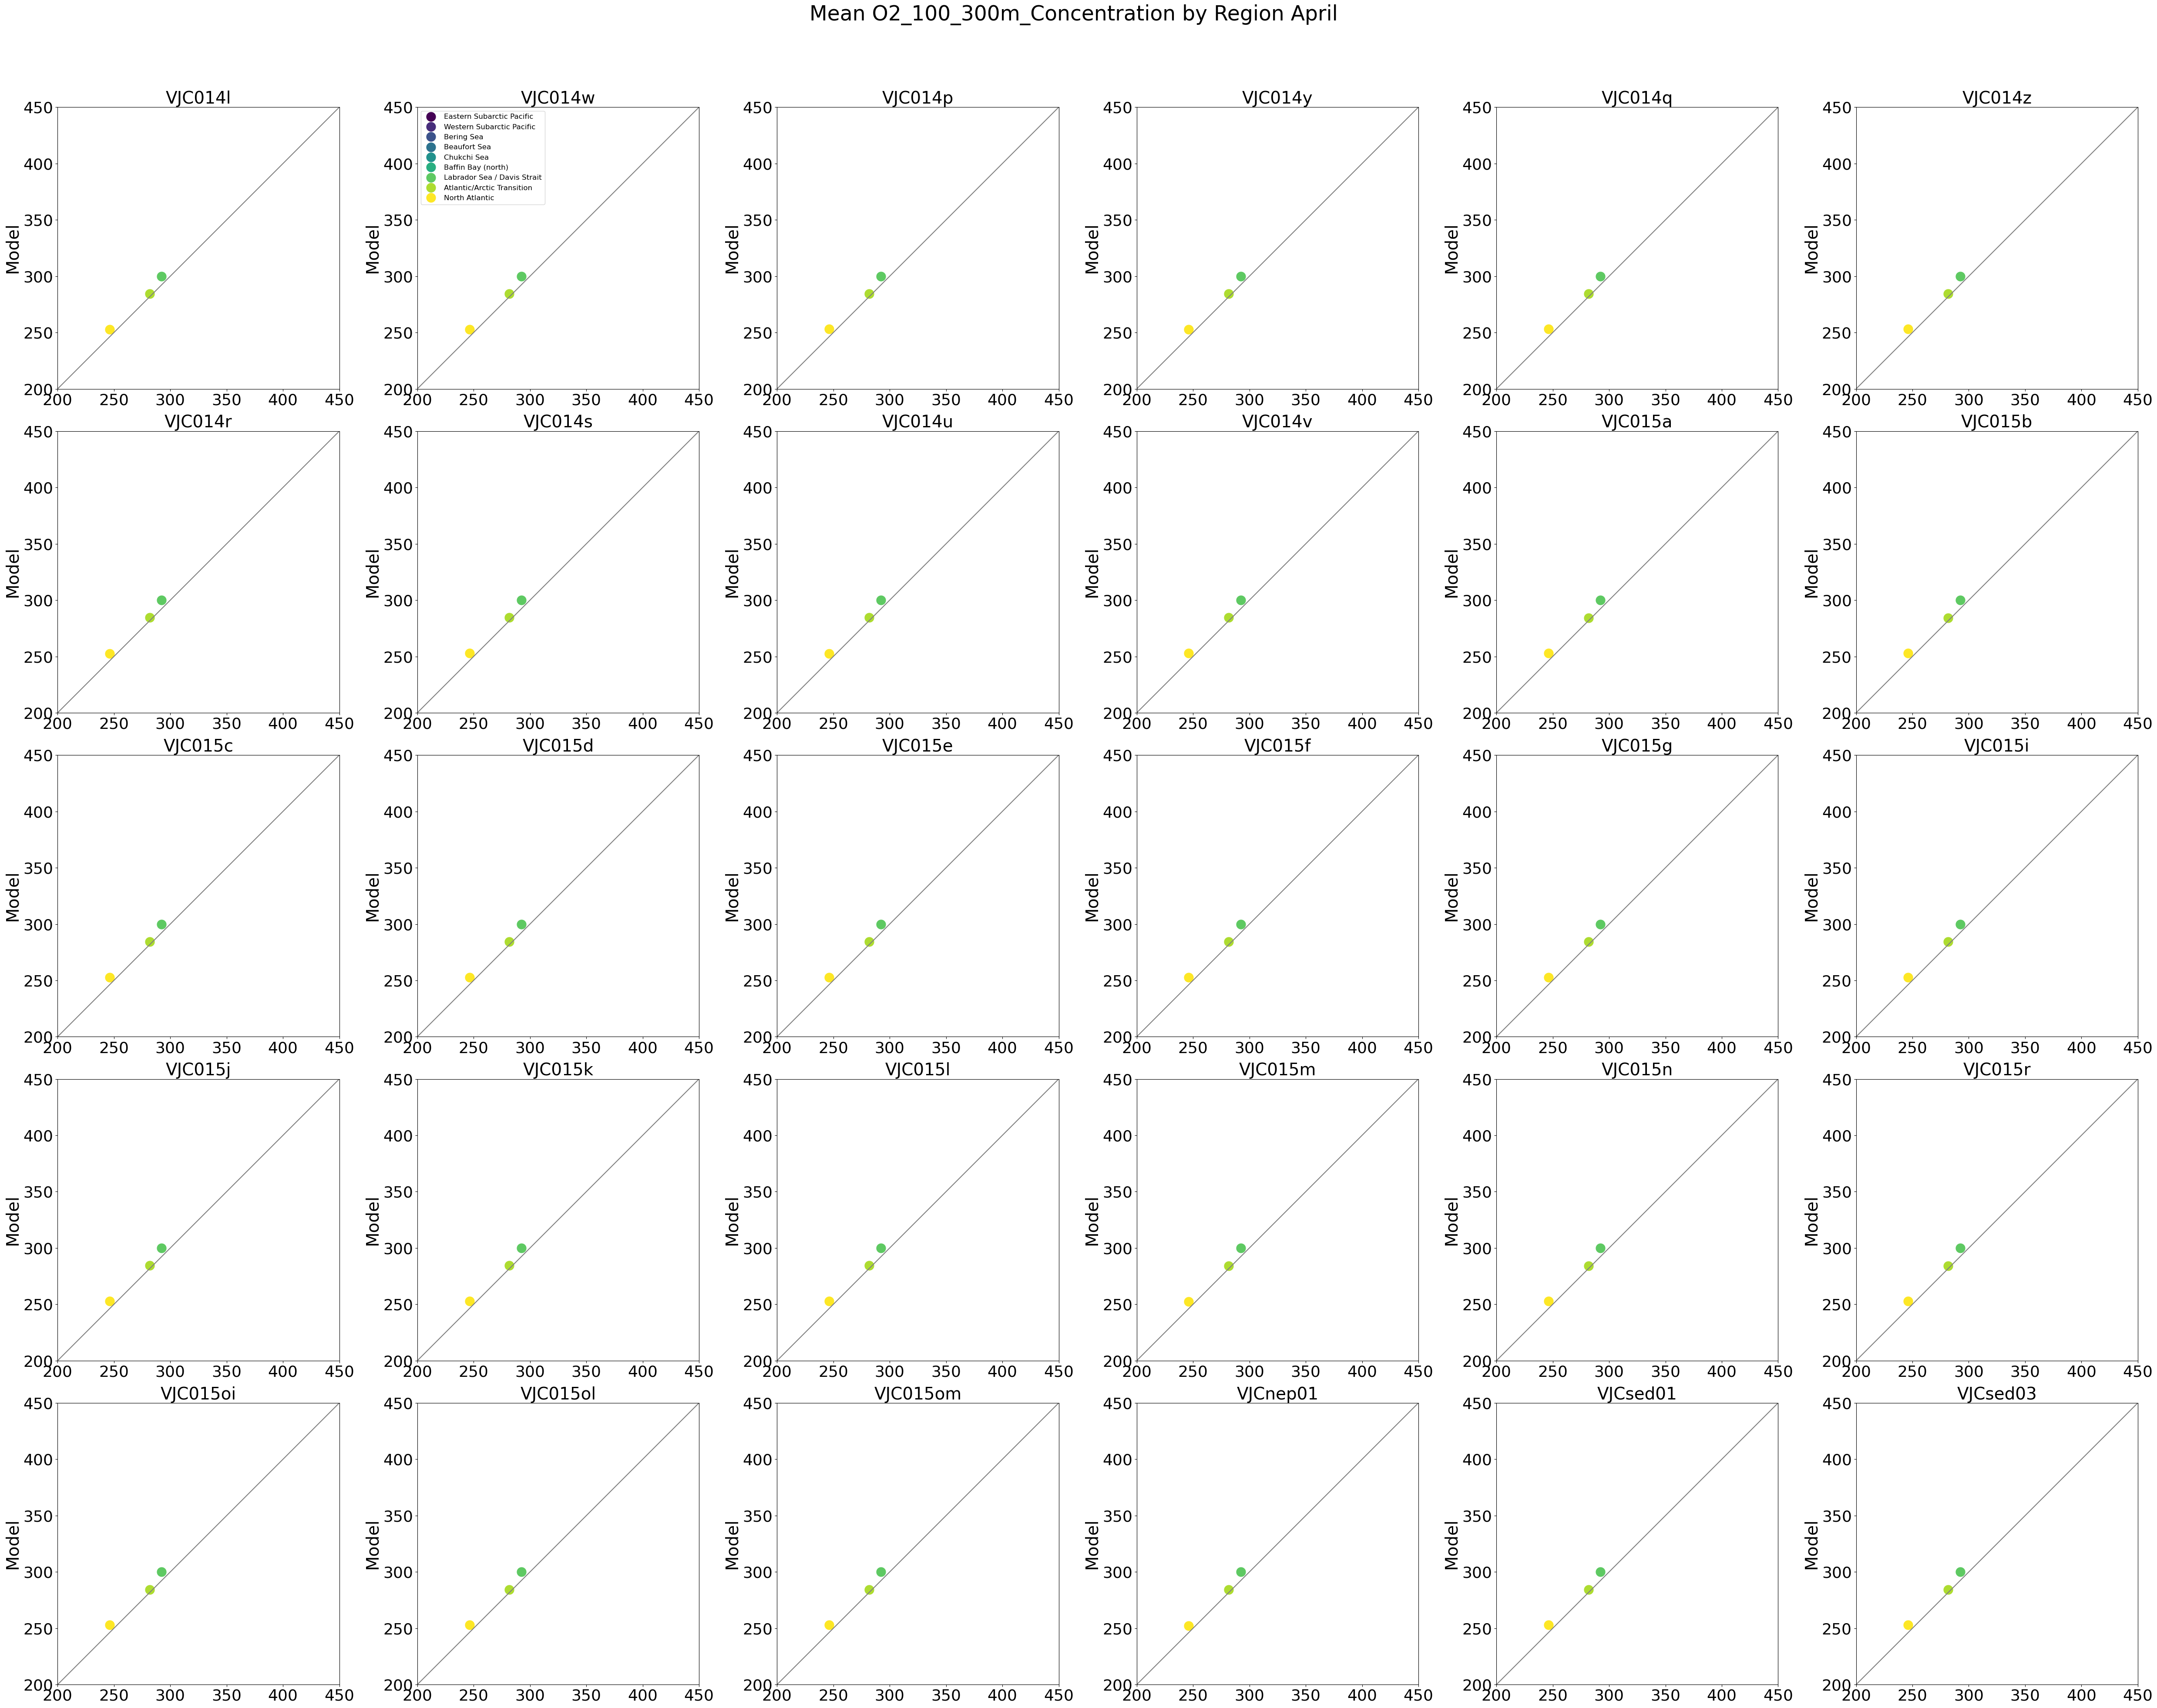

CREG025_LIM3_CANOE-VJC014l
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
CREG025_LIM3_CANOE-VJC014u
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
CREG025_LIM3_CANOE-VJC015g
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
CREG025_LIM3_CANOE-VJC015oi
['/home/fid000/WORK7/ANALYSIS/model_ev

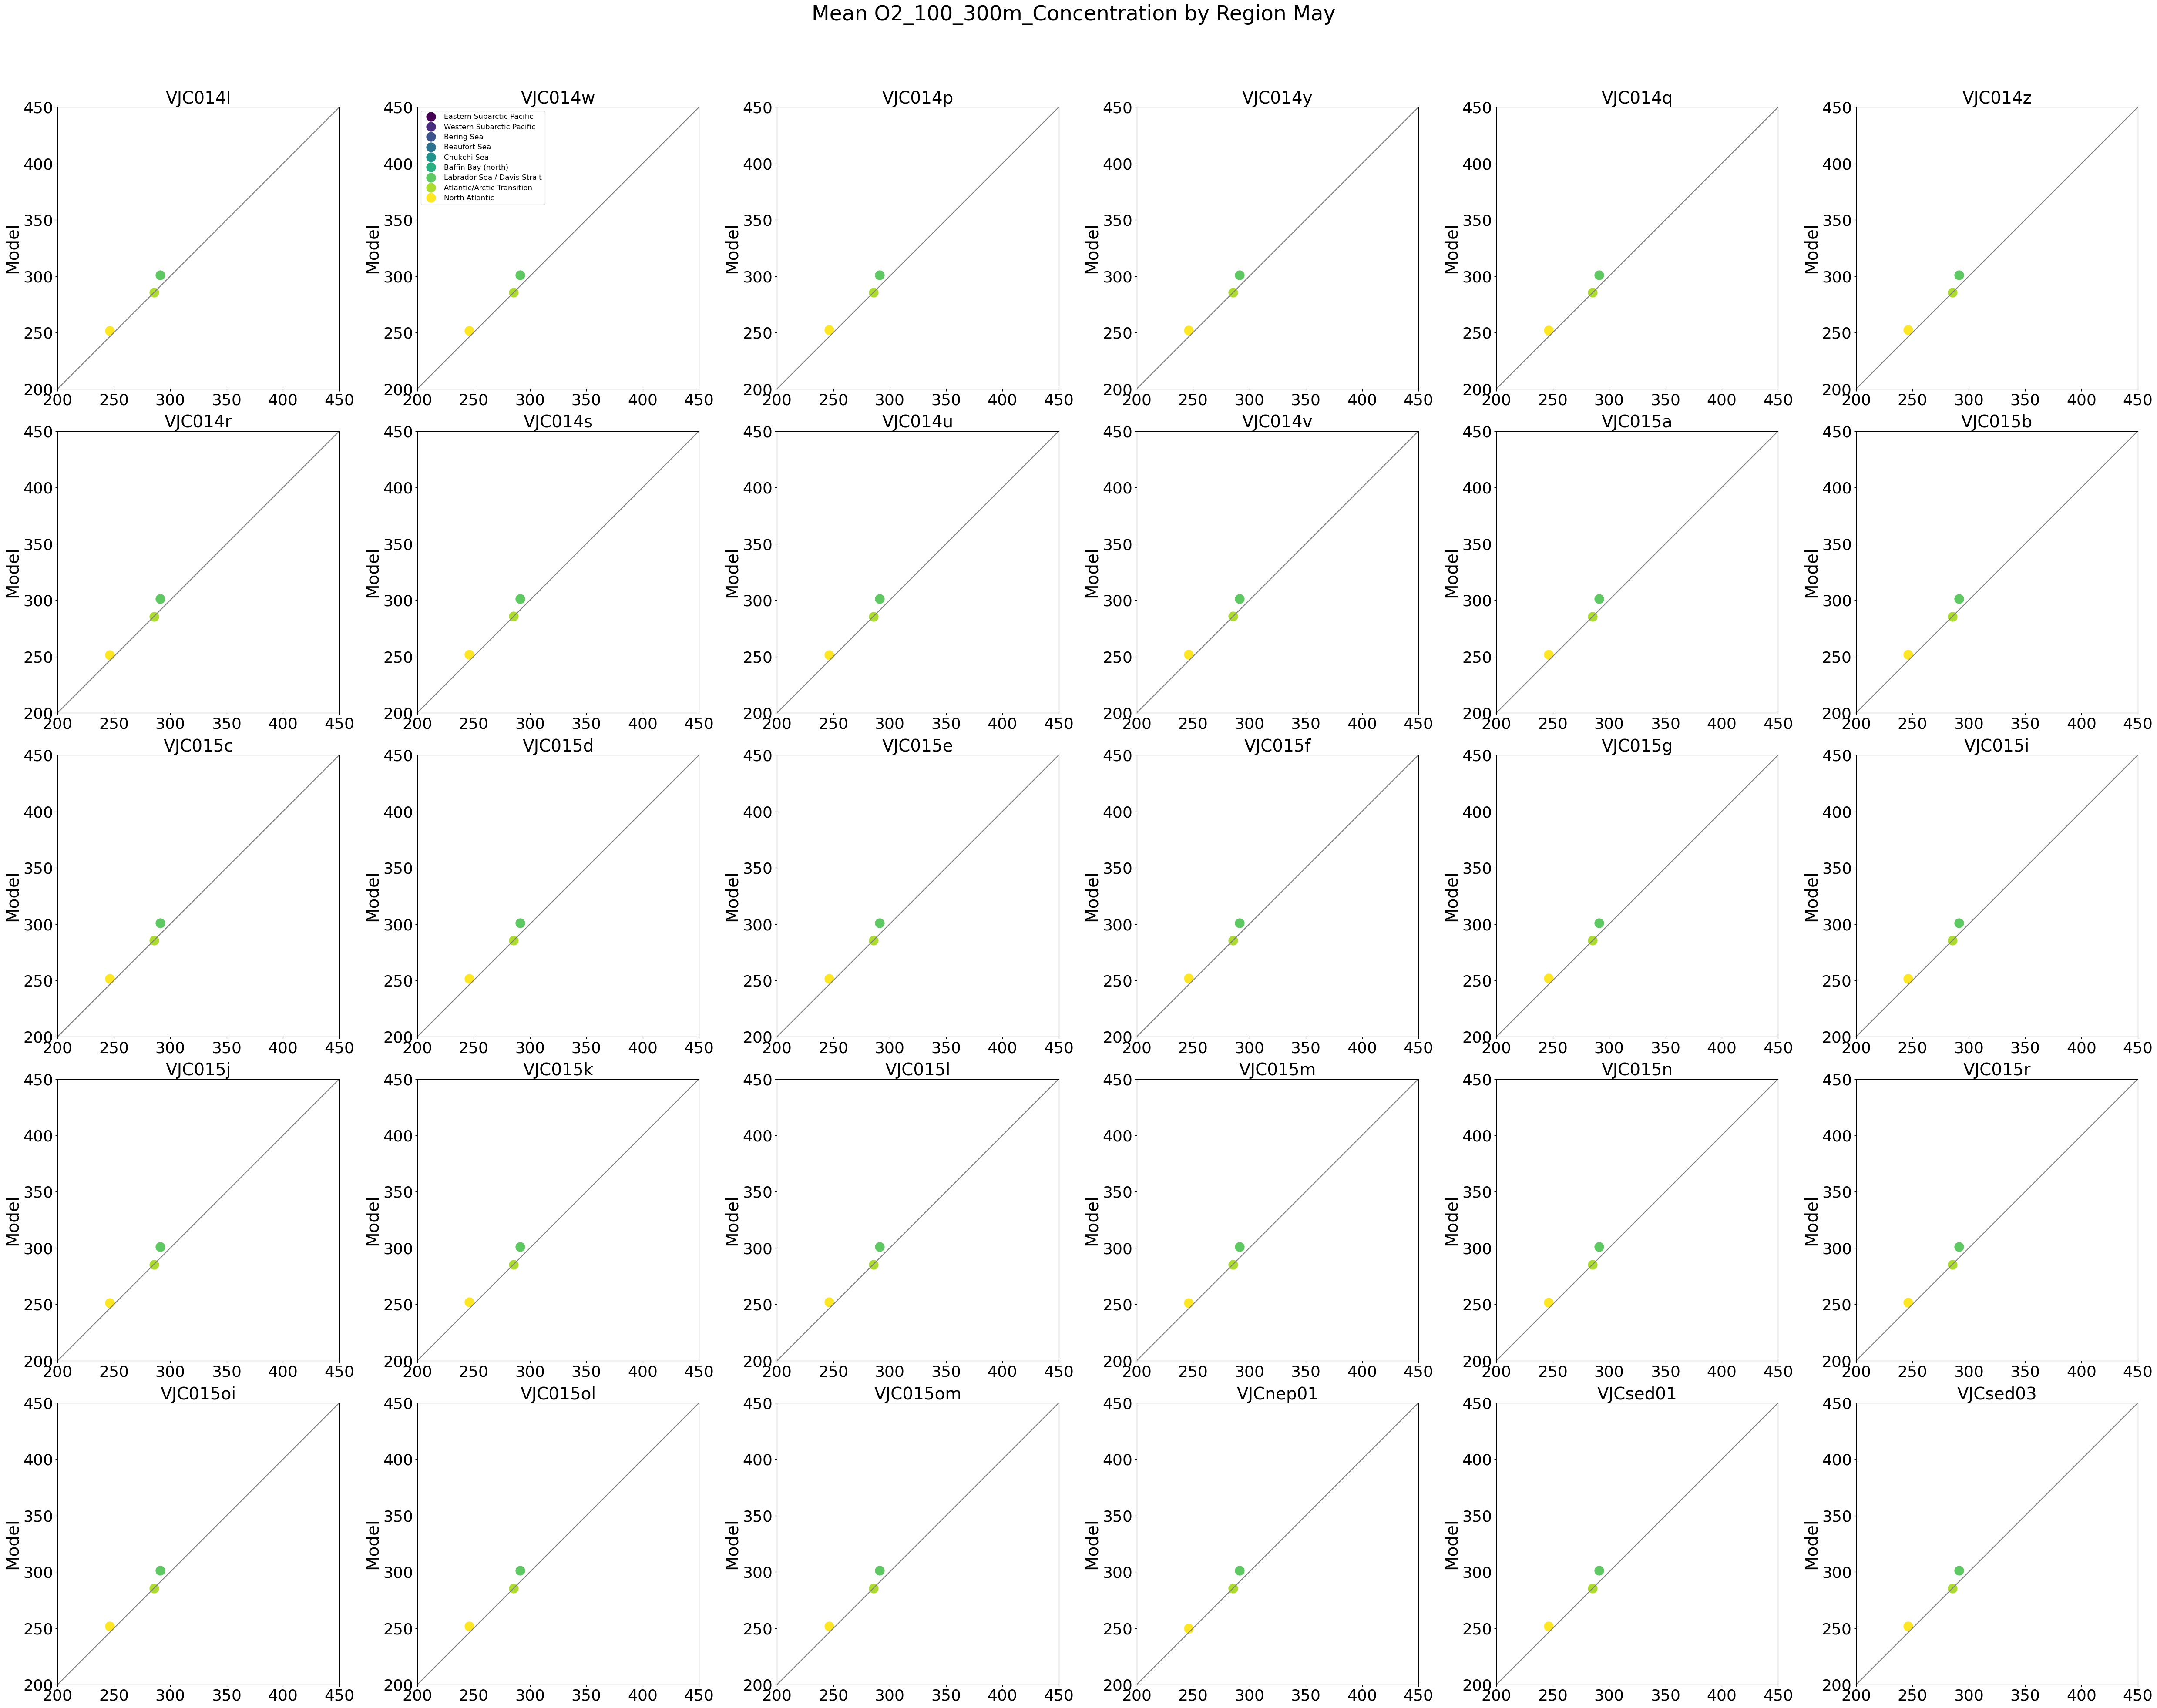

CREG025_LIM3_CANOE-VJC014l
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
CREG025_LIM3_CANOE-VJC014u
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
CREG025_LIM3_CANOE-VJC015g
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
CREG025_LIM3_CANOE-VJC015oi
['/home/fid000/WORK7/ANALYSIS/model_ev

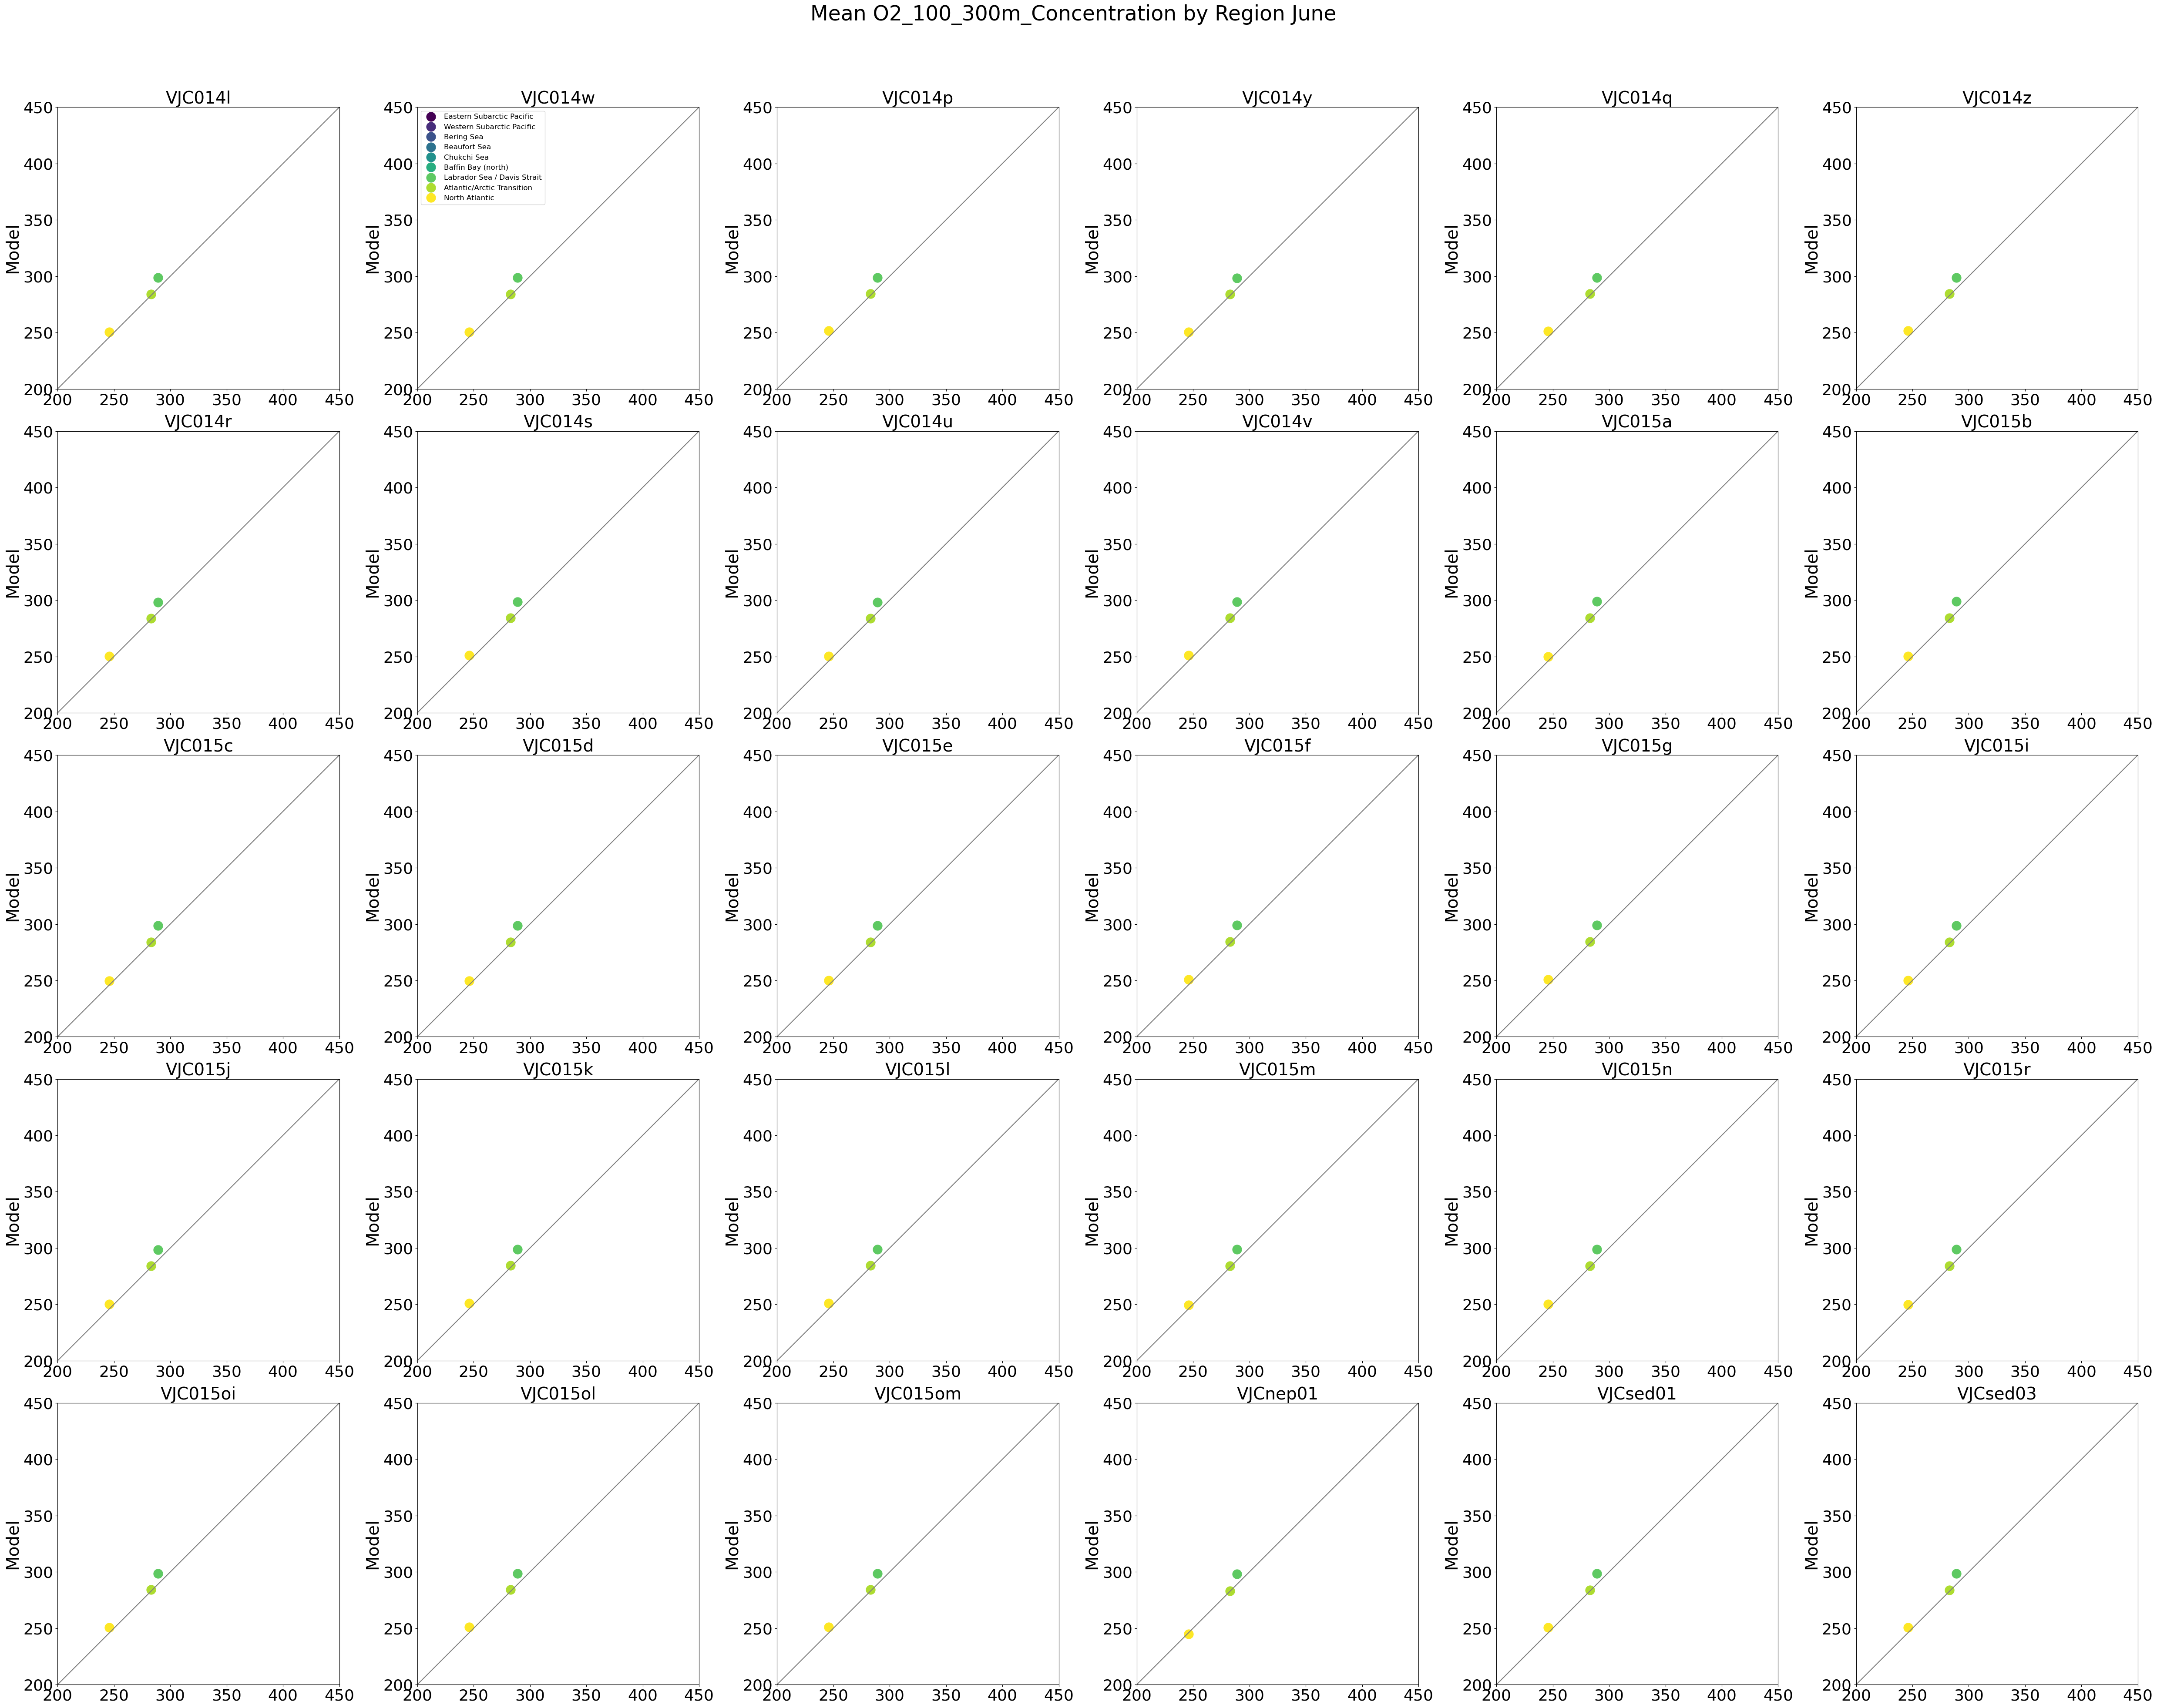

CREG025_LIM3_CANOE-VJC014l
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
CREG025_LIM3_CANOE-VJC014u
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
CREG025_LIM3_CANOE-VJC015g
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
CREG025_LIM3_CANOE-VJC015oi
['/home/fid000/WORK7/ANALYSIS/model_ev

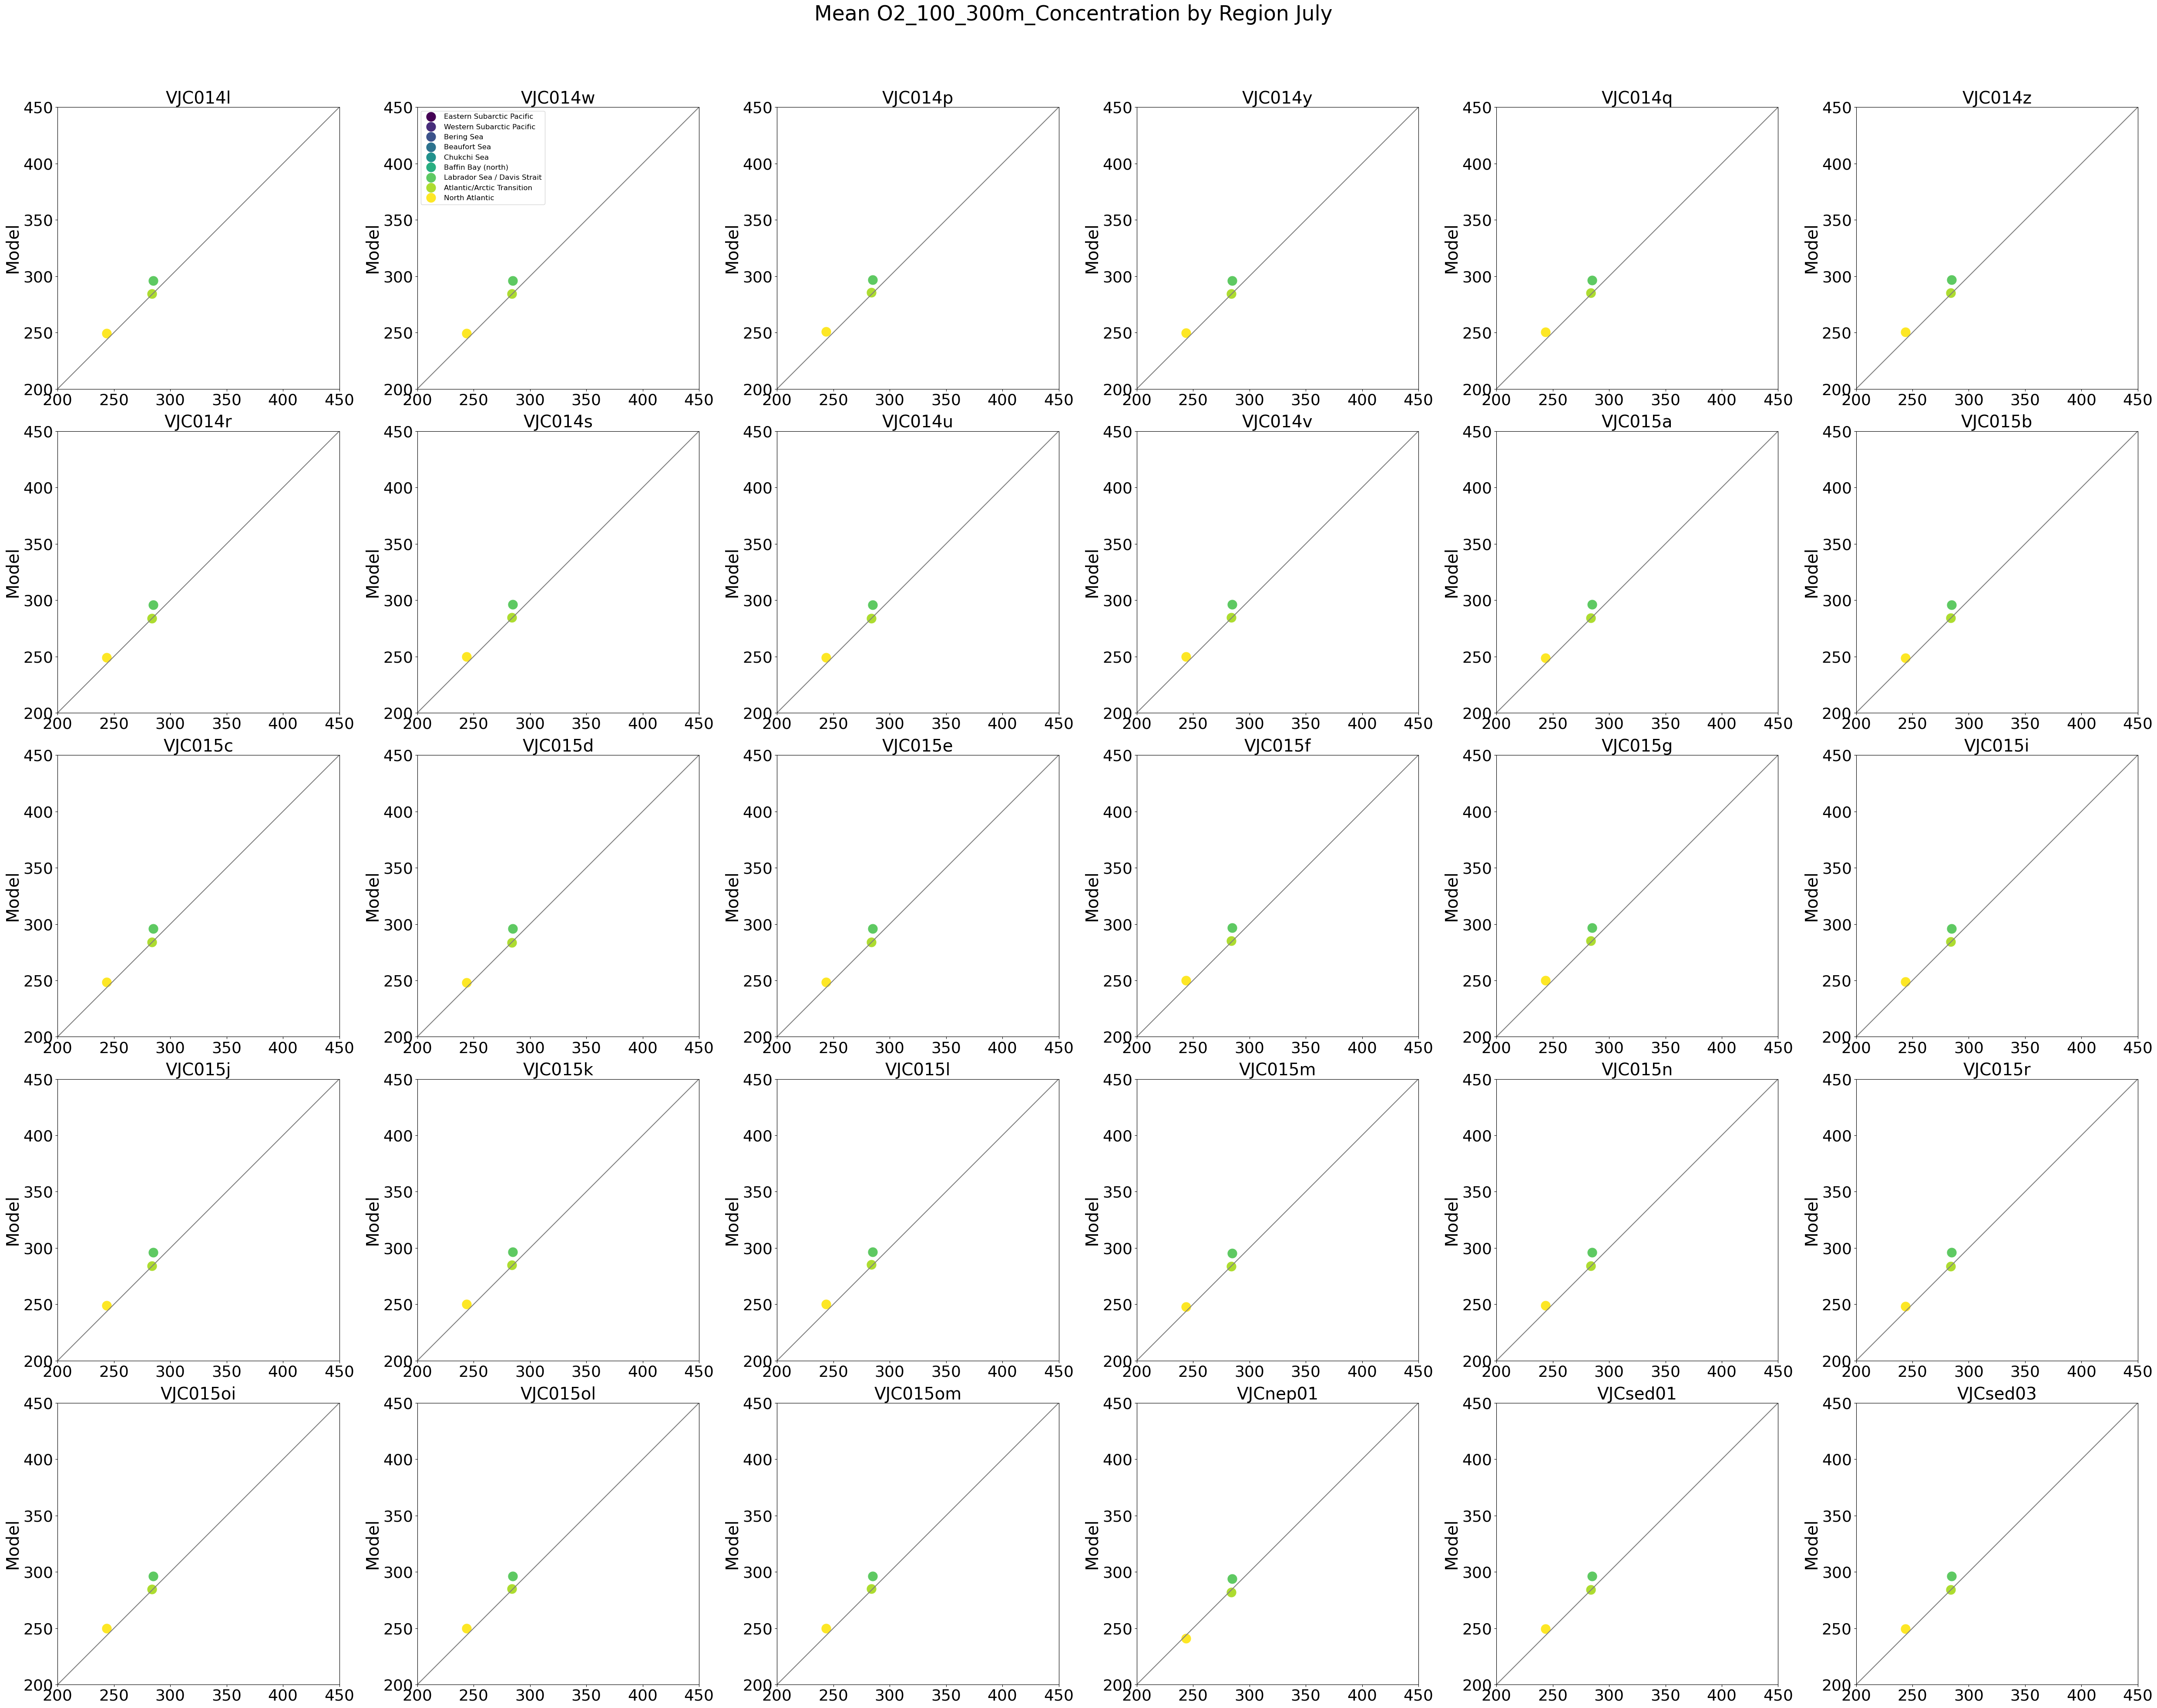

CREG025_LIM3_CANOE-VJC014l
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
CREG025_LIM3_CANOE-VJC014u
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
CREG025_LIM3_CANOE-VJC015g
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
CREG025_LIM3_CANOE-VJC015oi
['/home/fid000/WORK7/ANALYSIS/model_ev

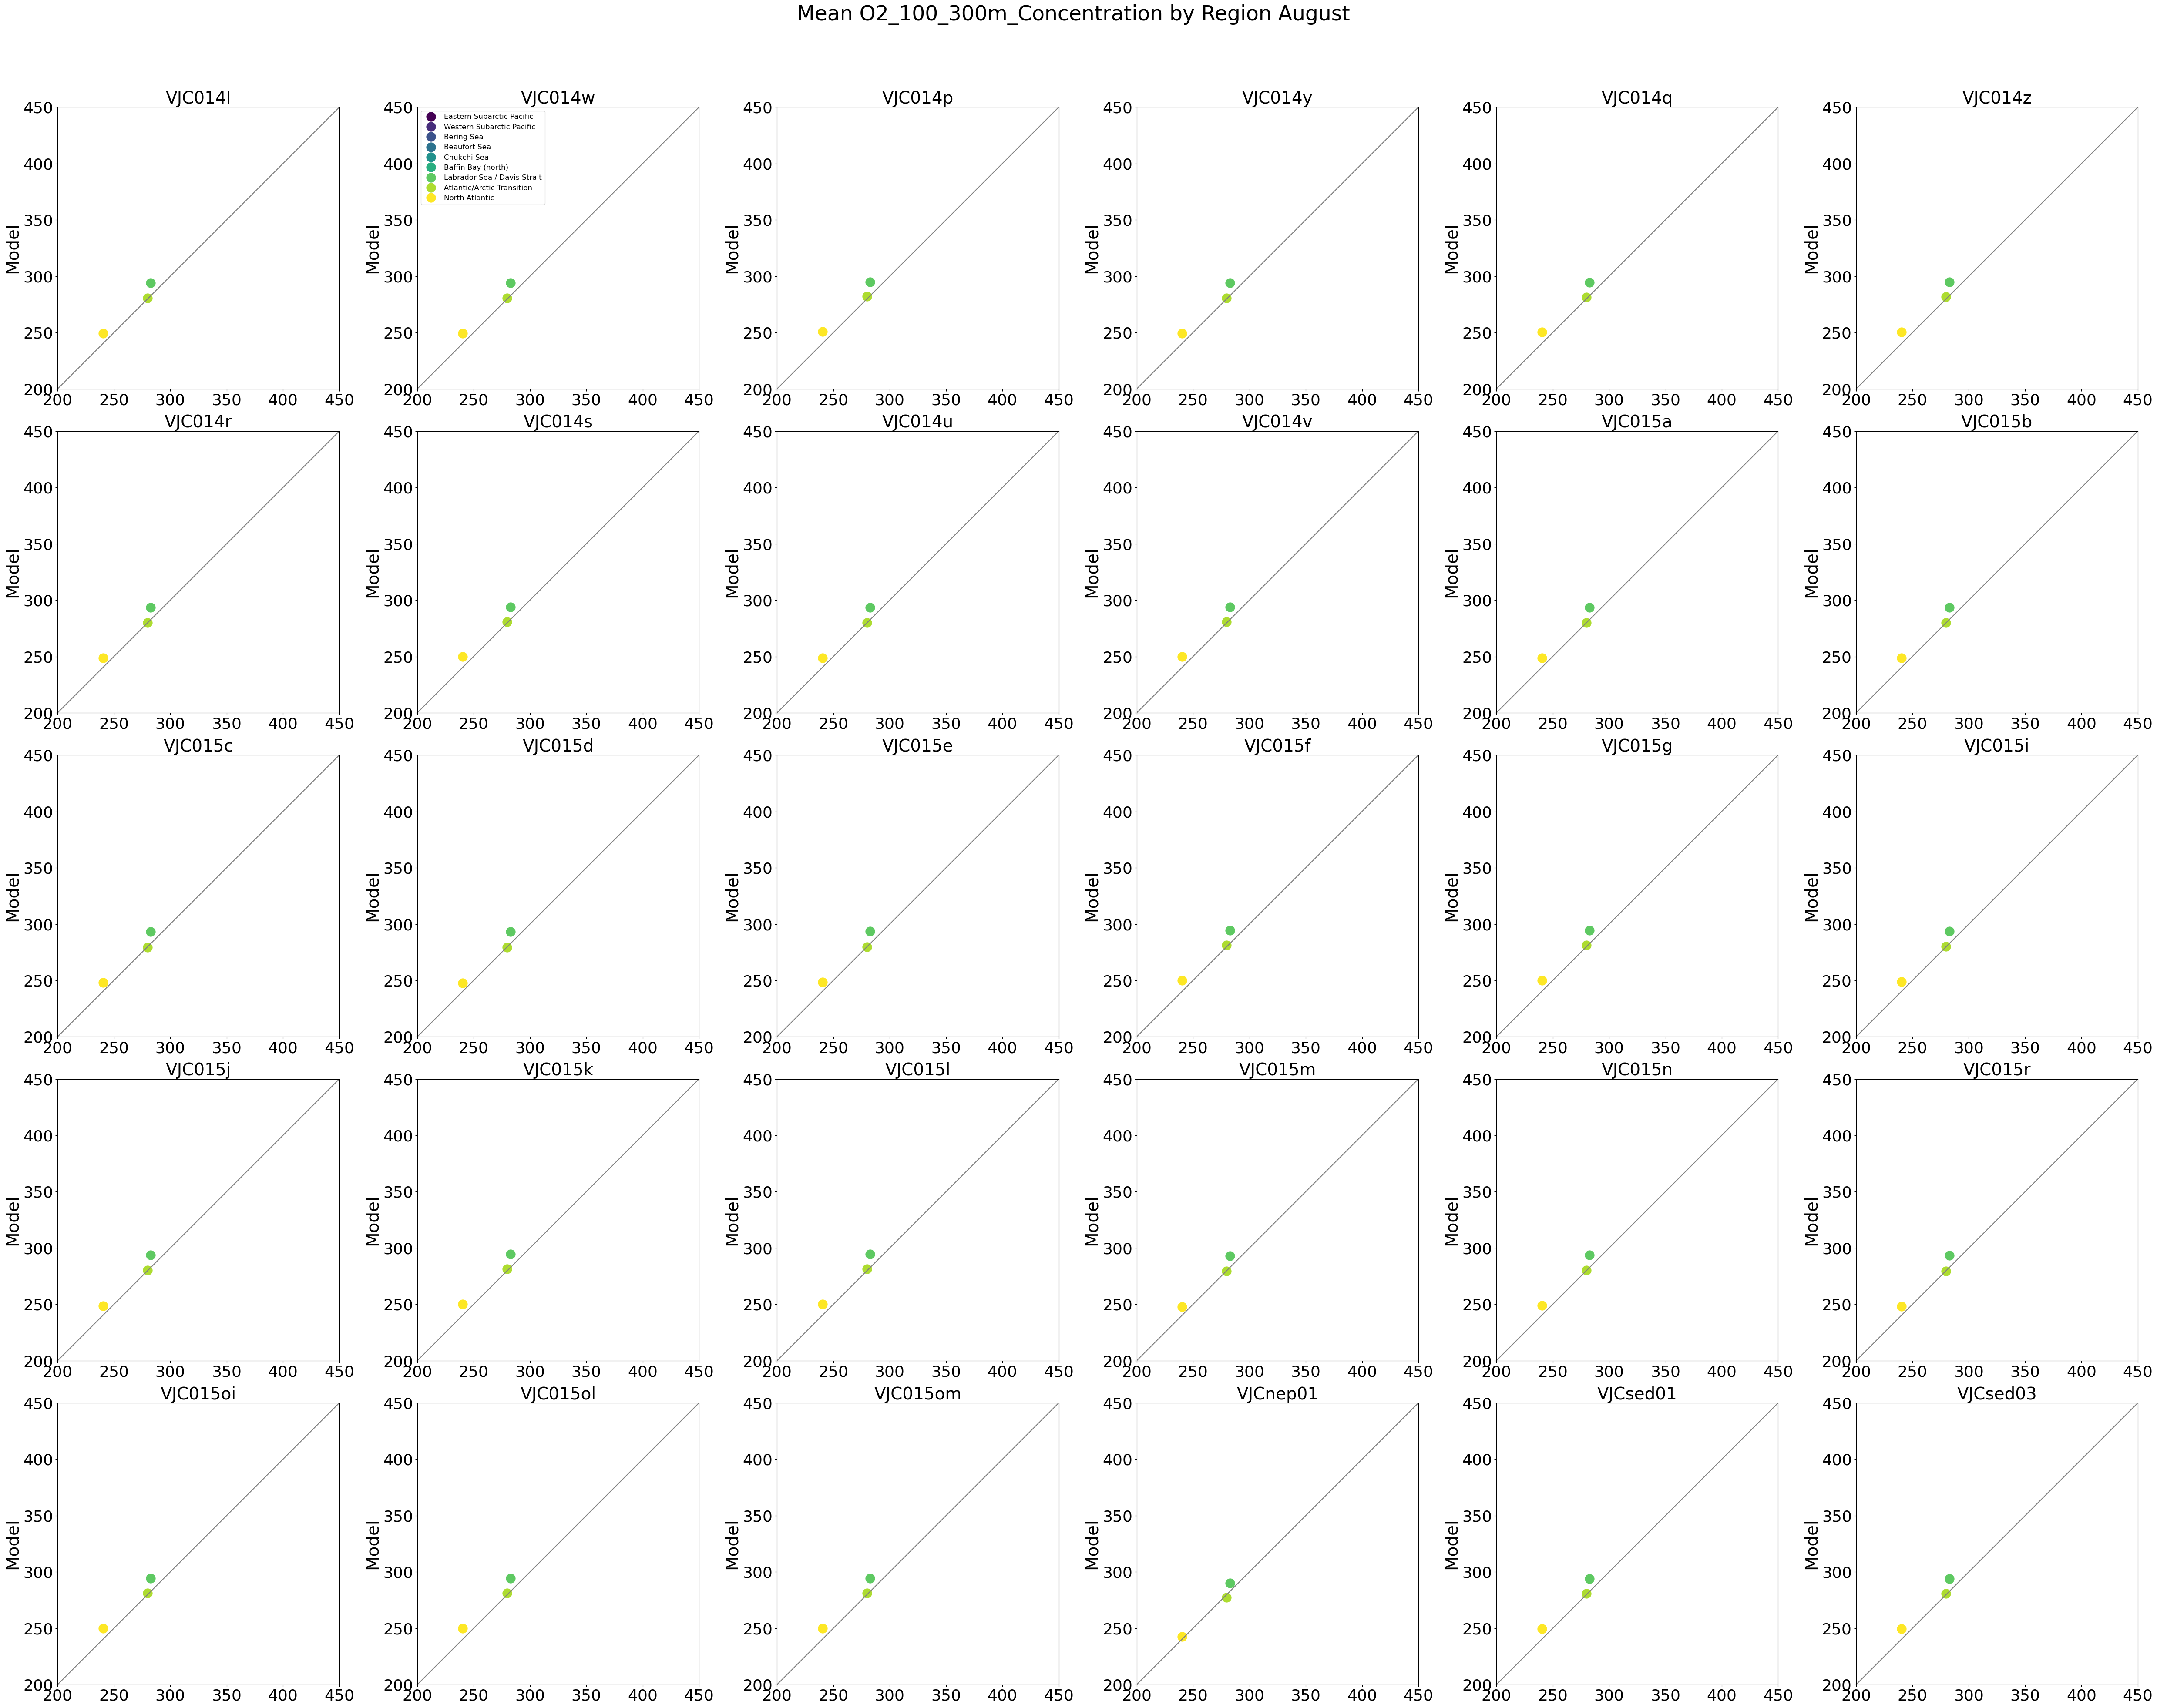

CREG025_LIM3_CANOE-VJC014l
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
CREG025_LIM3_CANOE-VJC014u
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
CREG025_LIM3_CANOE-VJC015g
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
CREG025_LIM3_CANOE-VJC015oi
['/home/fid000/WORK7/ANALYSIS/model_ev

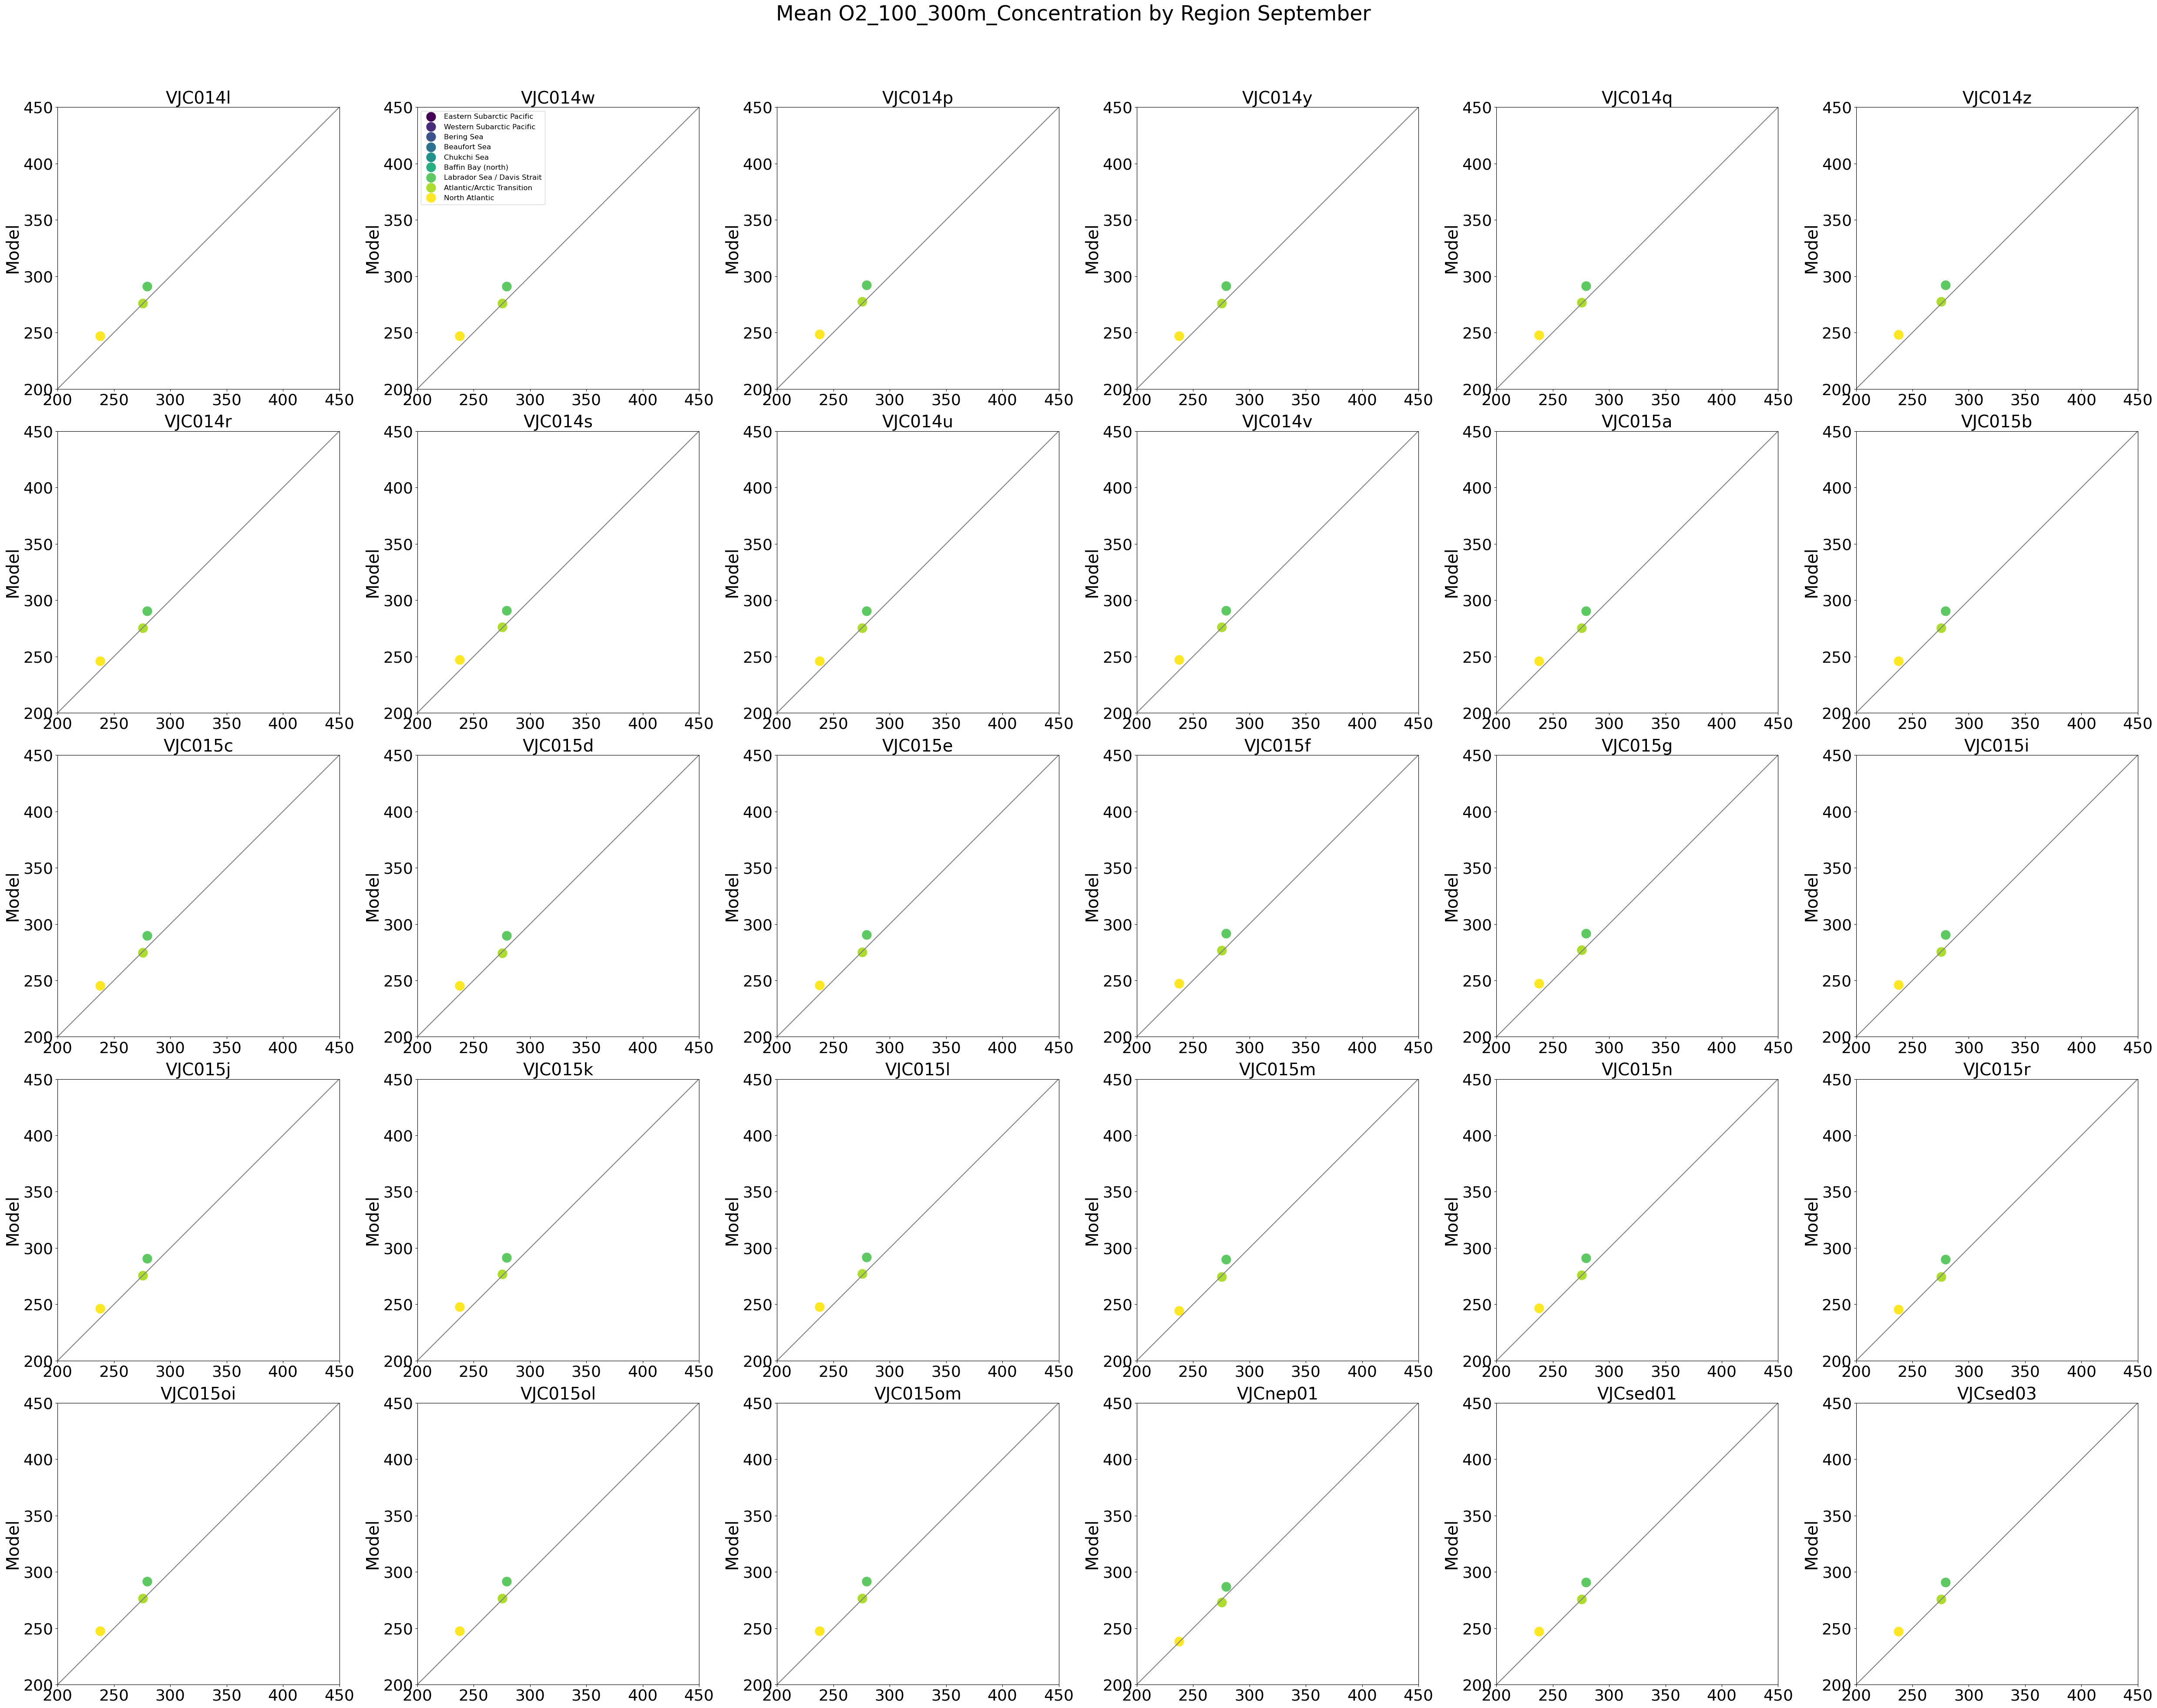

CREG025_LIM3_CANOE-VJC014l
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
CREG025_LIM3_CANOE-VJC014u
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
CREG025_LIM3_CANOE-VJC015g
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
CREG025_LIM3_CANOE-VJC015oi
['/home/fid000/WORK7/ANALYSIS/model_ev

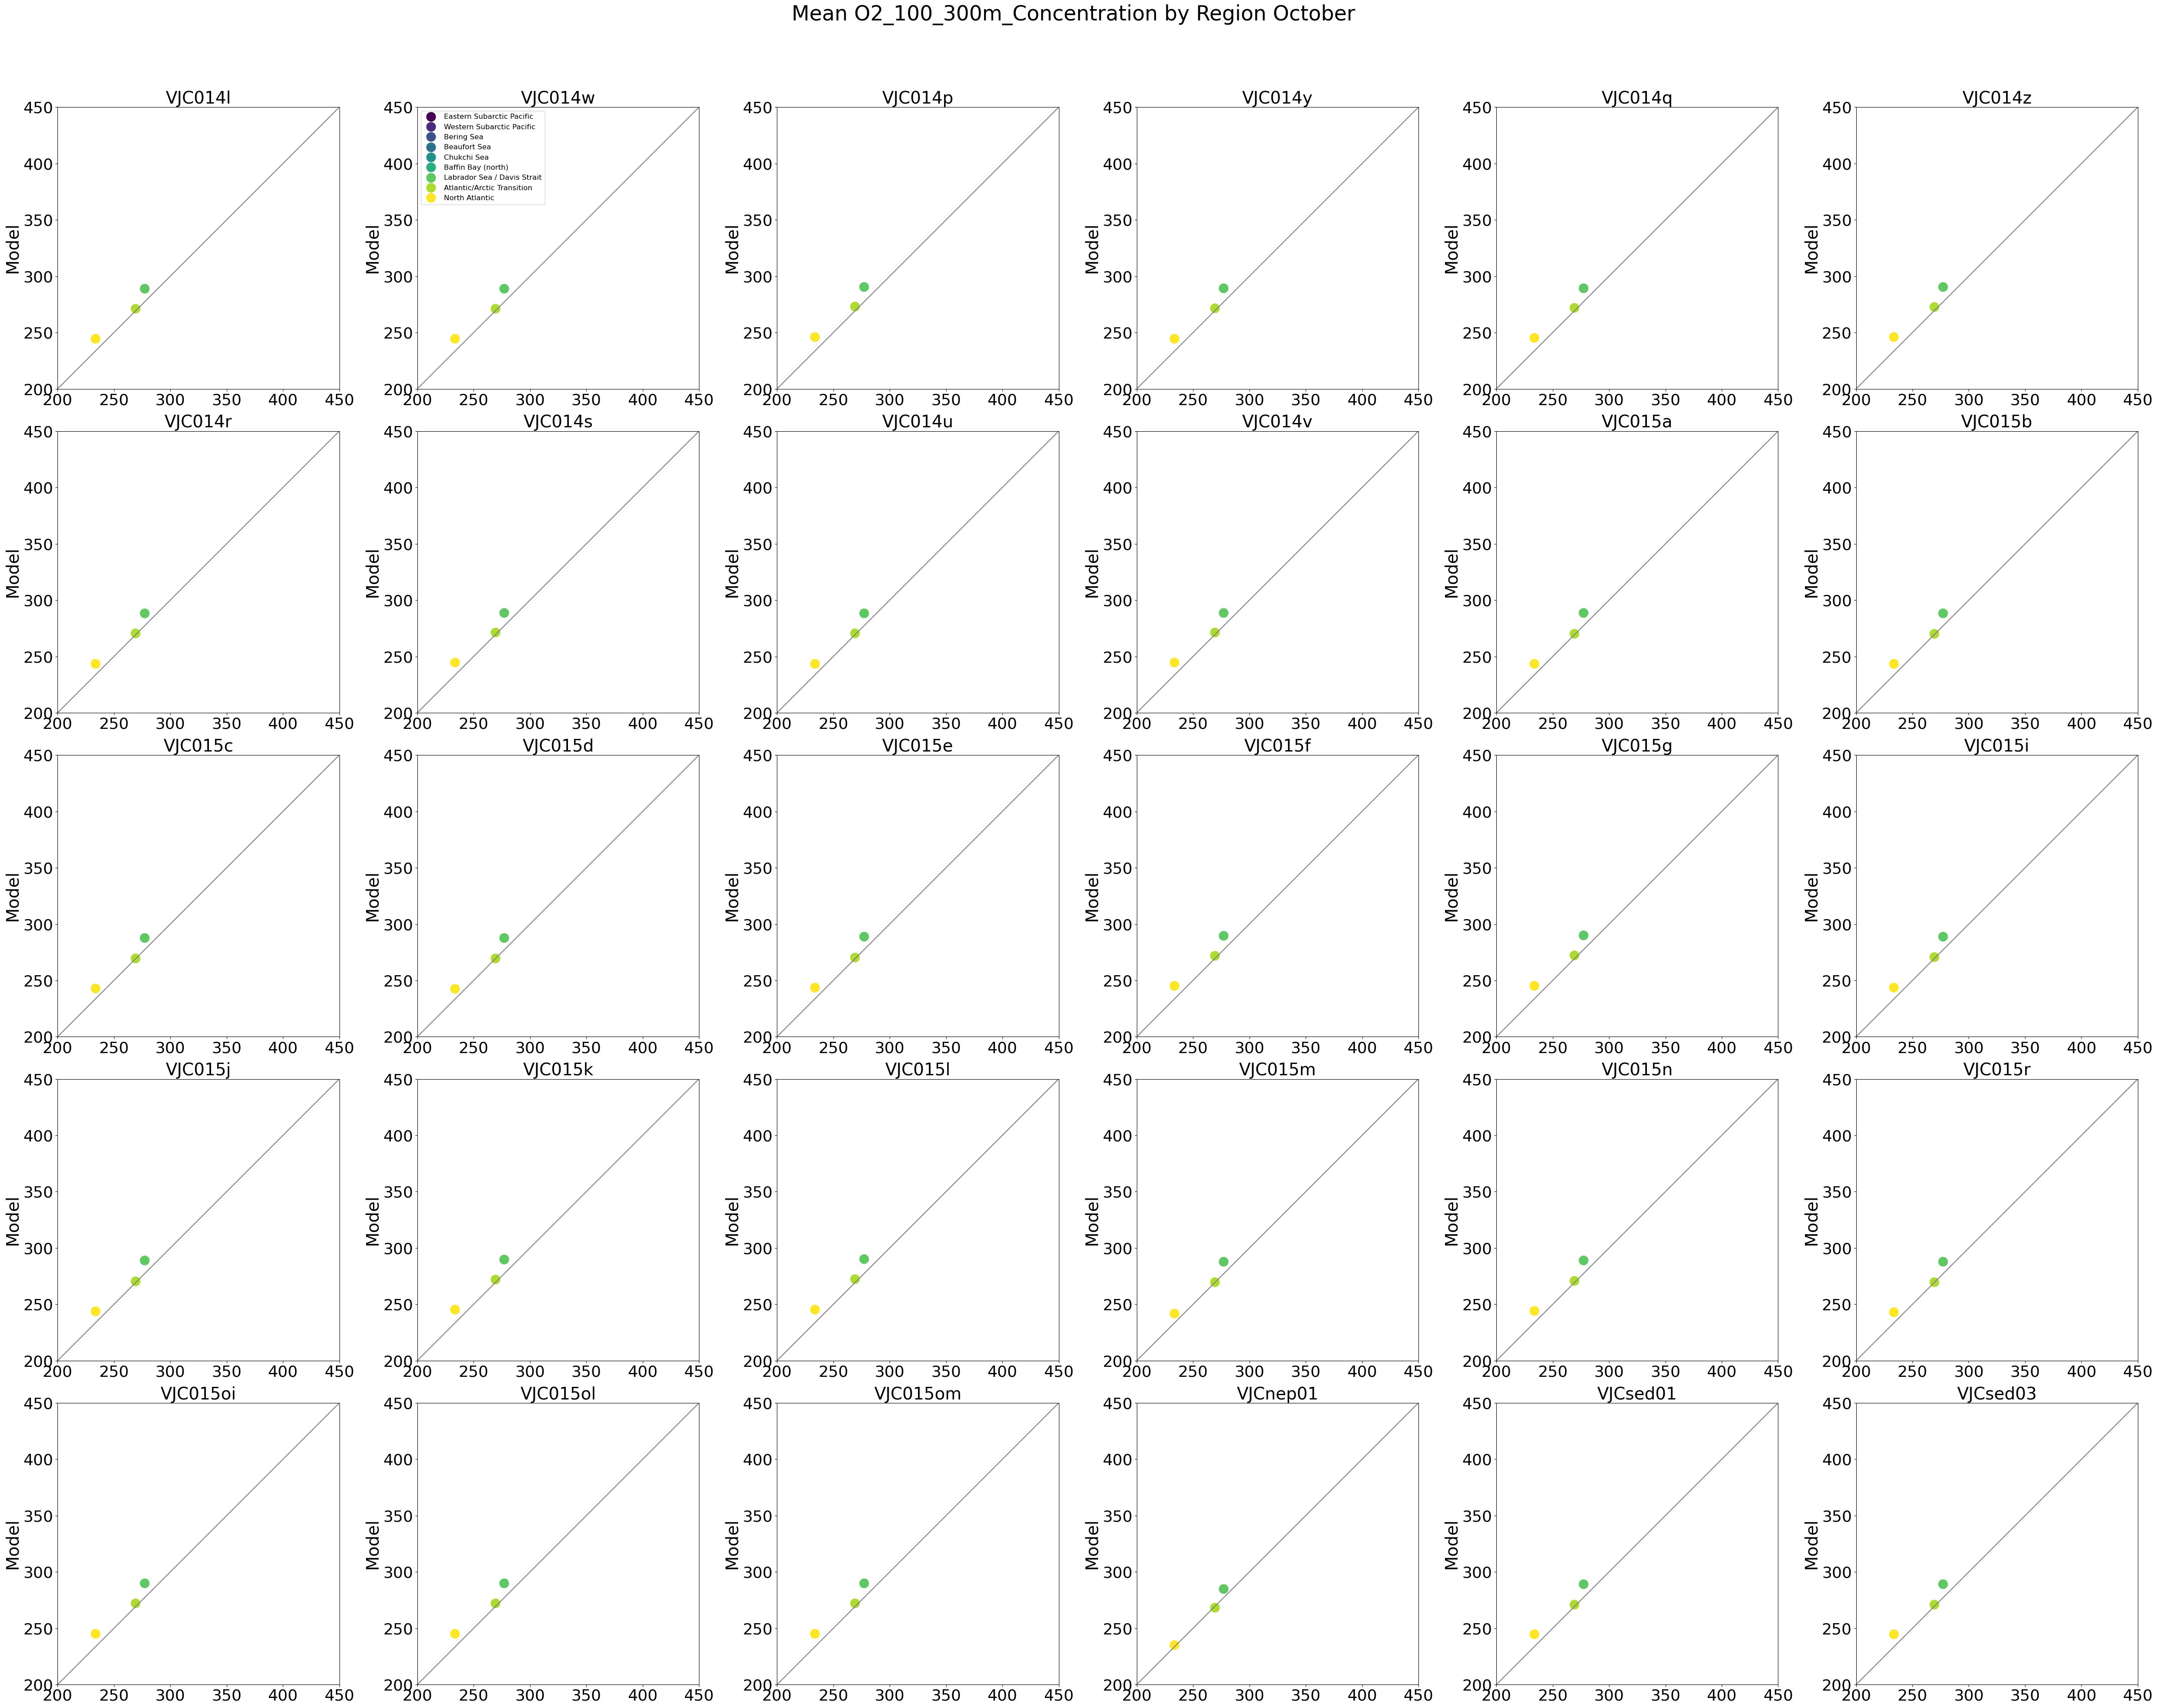

CREG025_LIM3_CANOE-VJC014l
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
CREG025_LIM3_CANOE-VJC014u
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
CREG025_LIM3_CANOE-VJC015g
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
CREG025_LIM3_CANOE-VJC015oi
['/home/fid000/WORK7/ANALYSIS/model_ev

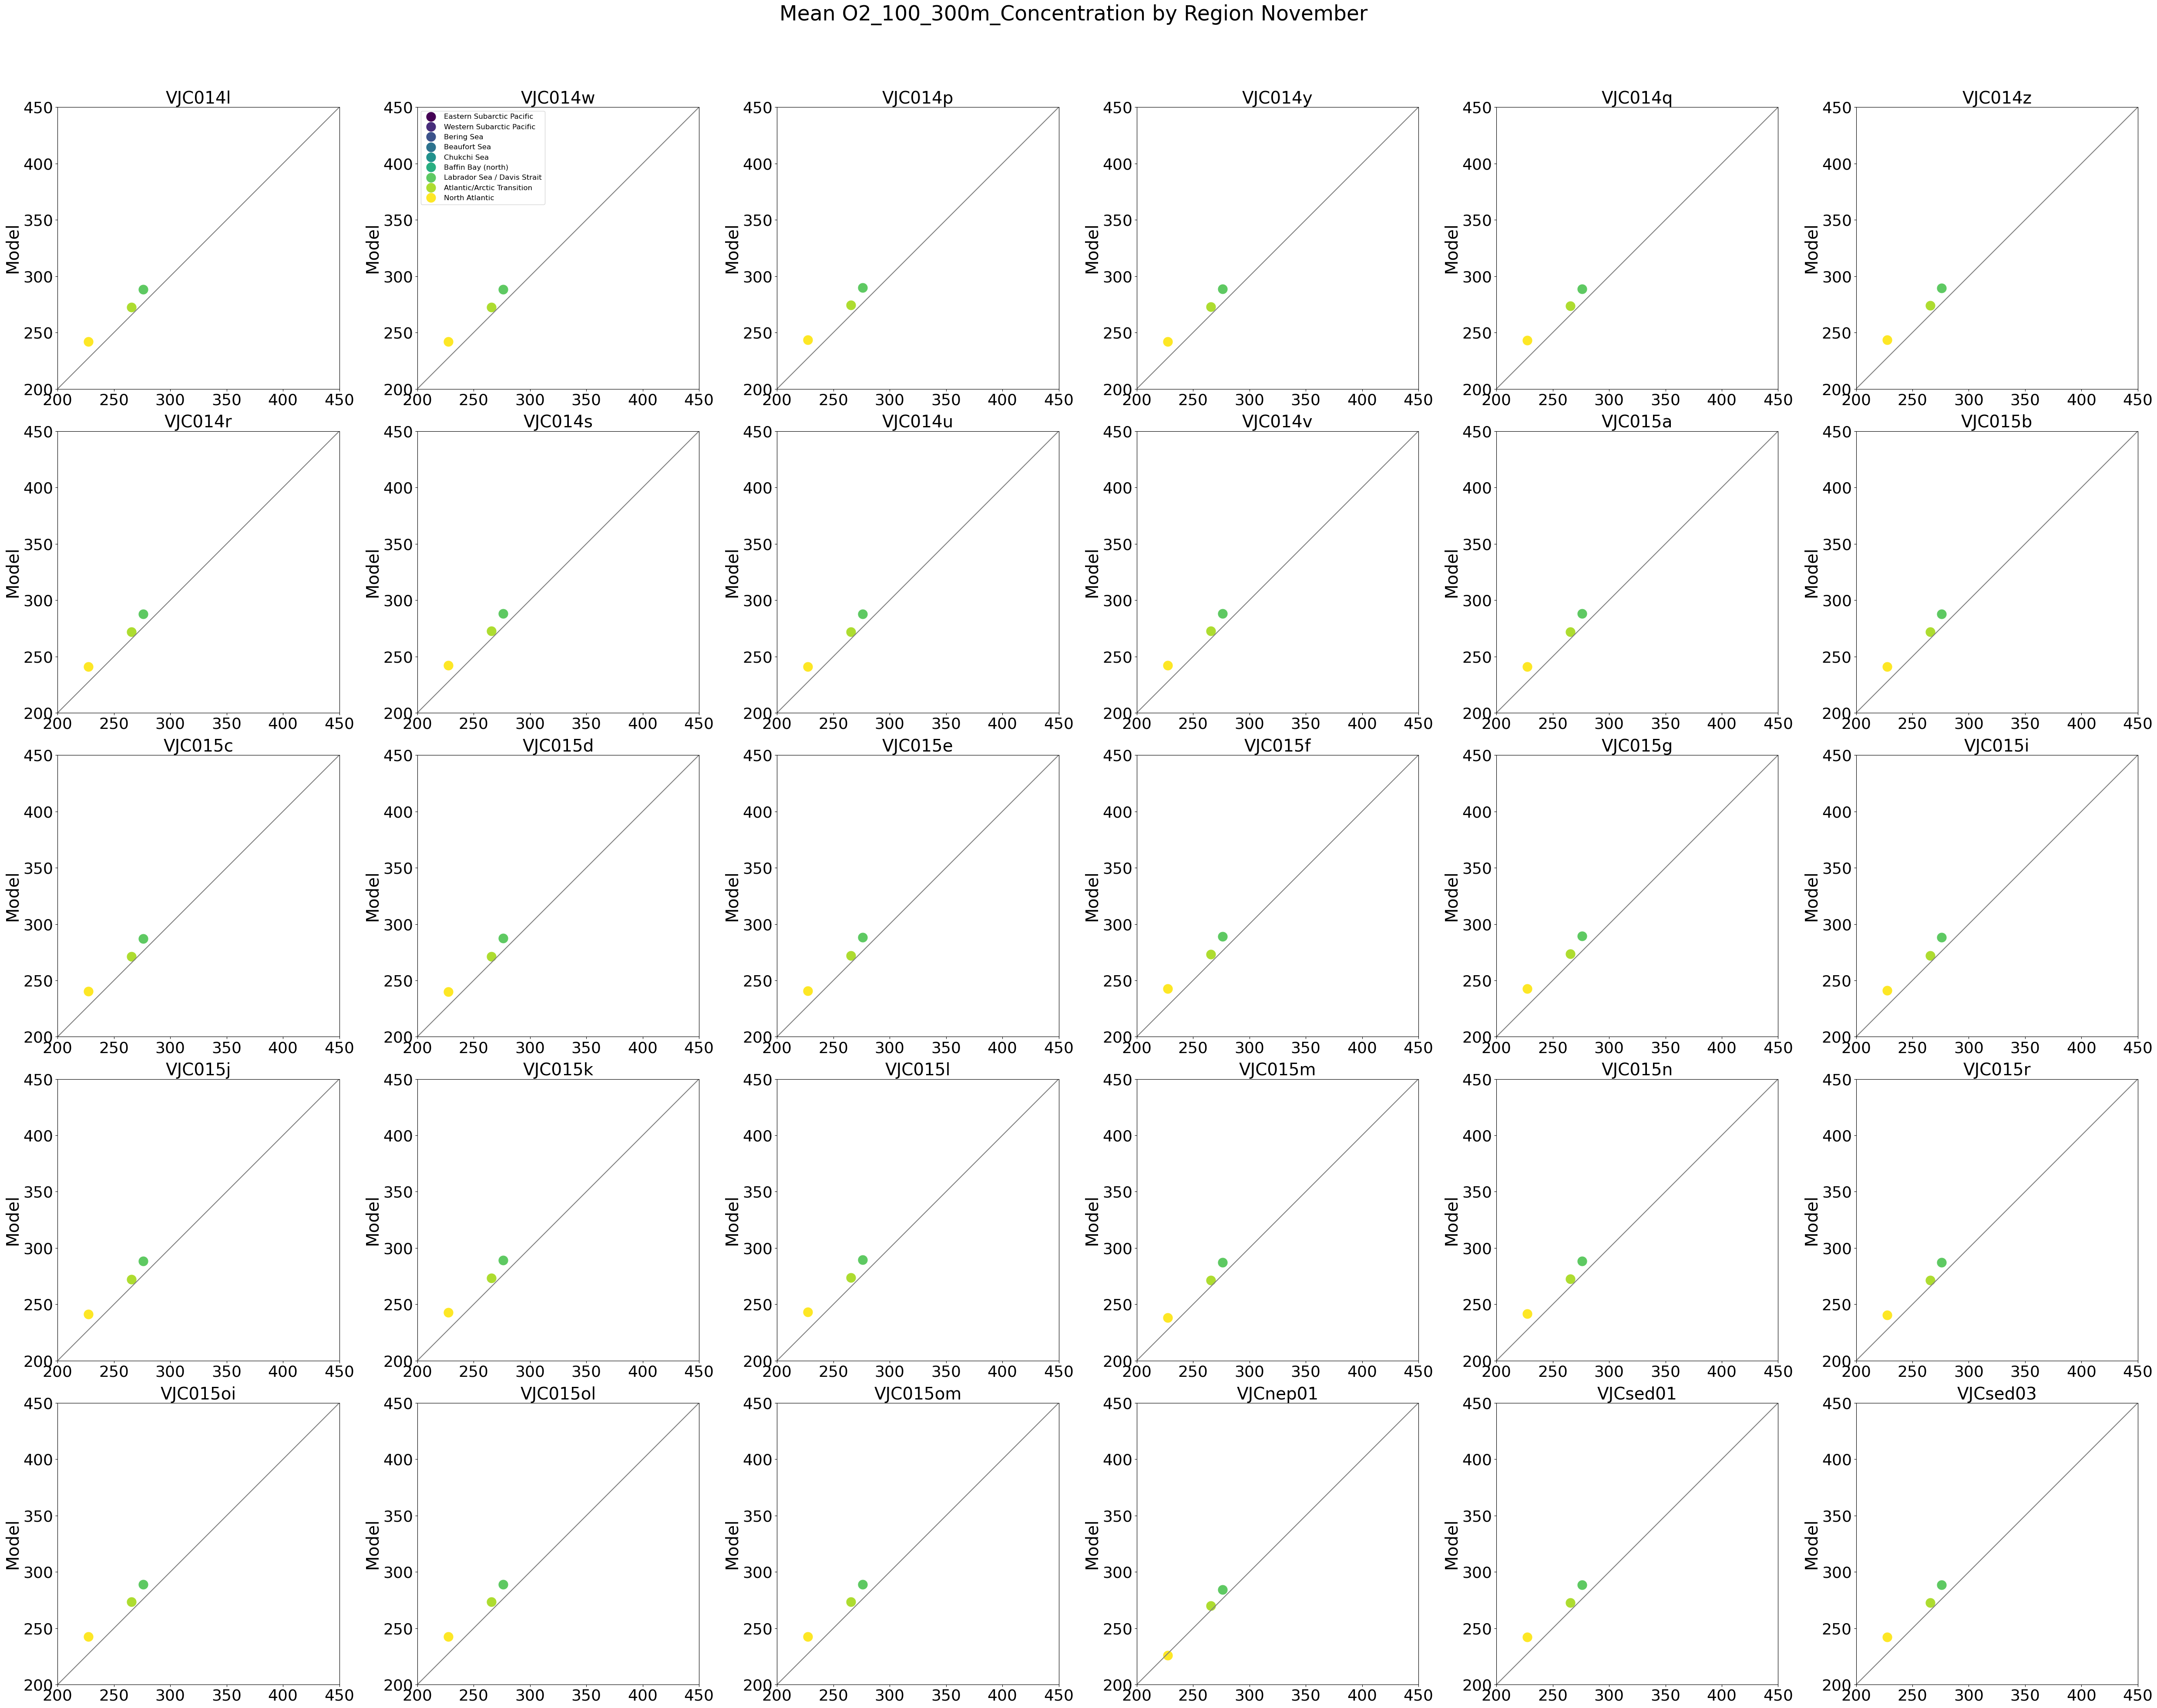

CREG025_LIM3_CANOE-VJC014l
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014l_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014s_monthly_O2.nc
CREG025_LIM3_CANOE-VJC014u
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC014u_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015f_monthly_O2.nc
CREG025_LIM3_CANOE-VJC015g
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015g_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_e

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/CREG025_LIM3_CANOE-VJC015r_monthly_O2.nc
CREG025_LIM3_CANOE-VJC015oi
['/home/fid000/WORK7/ANALYSIS/model_ev

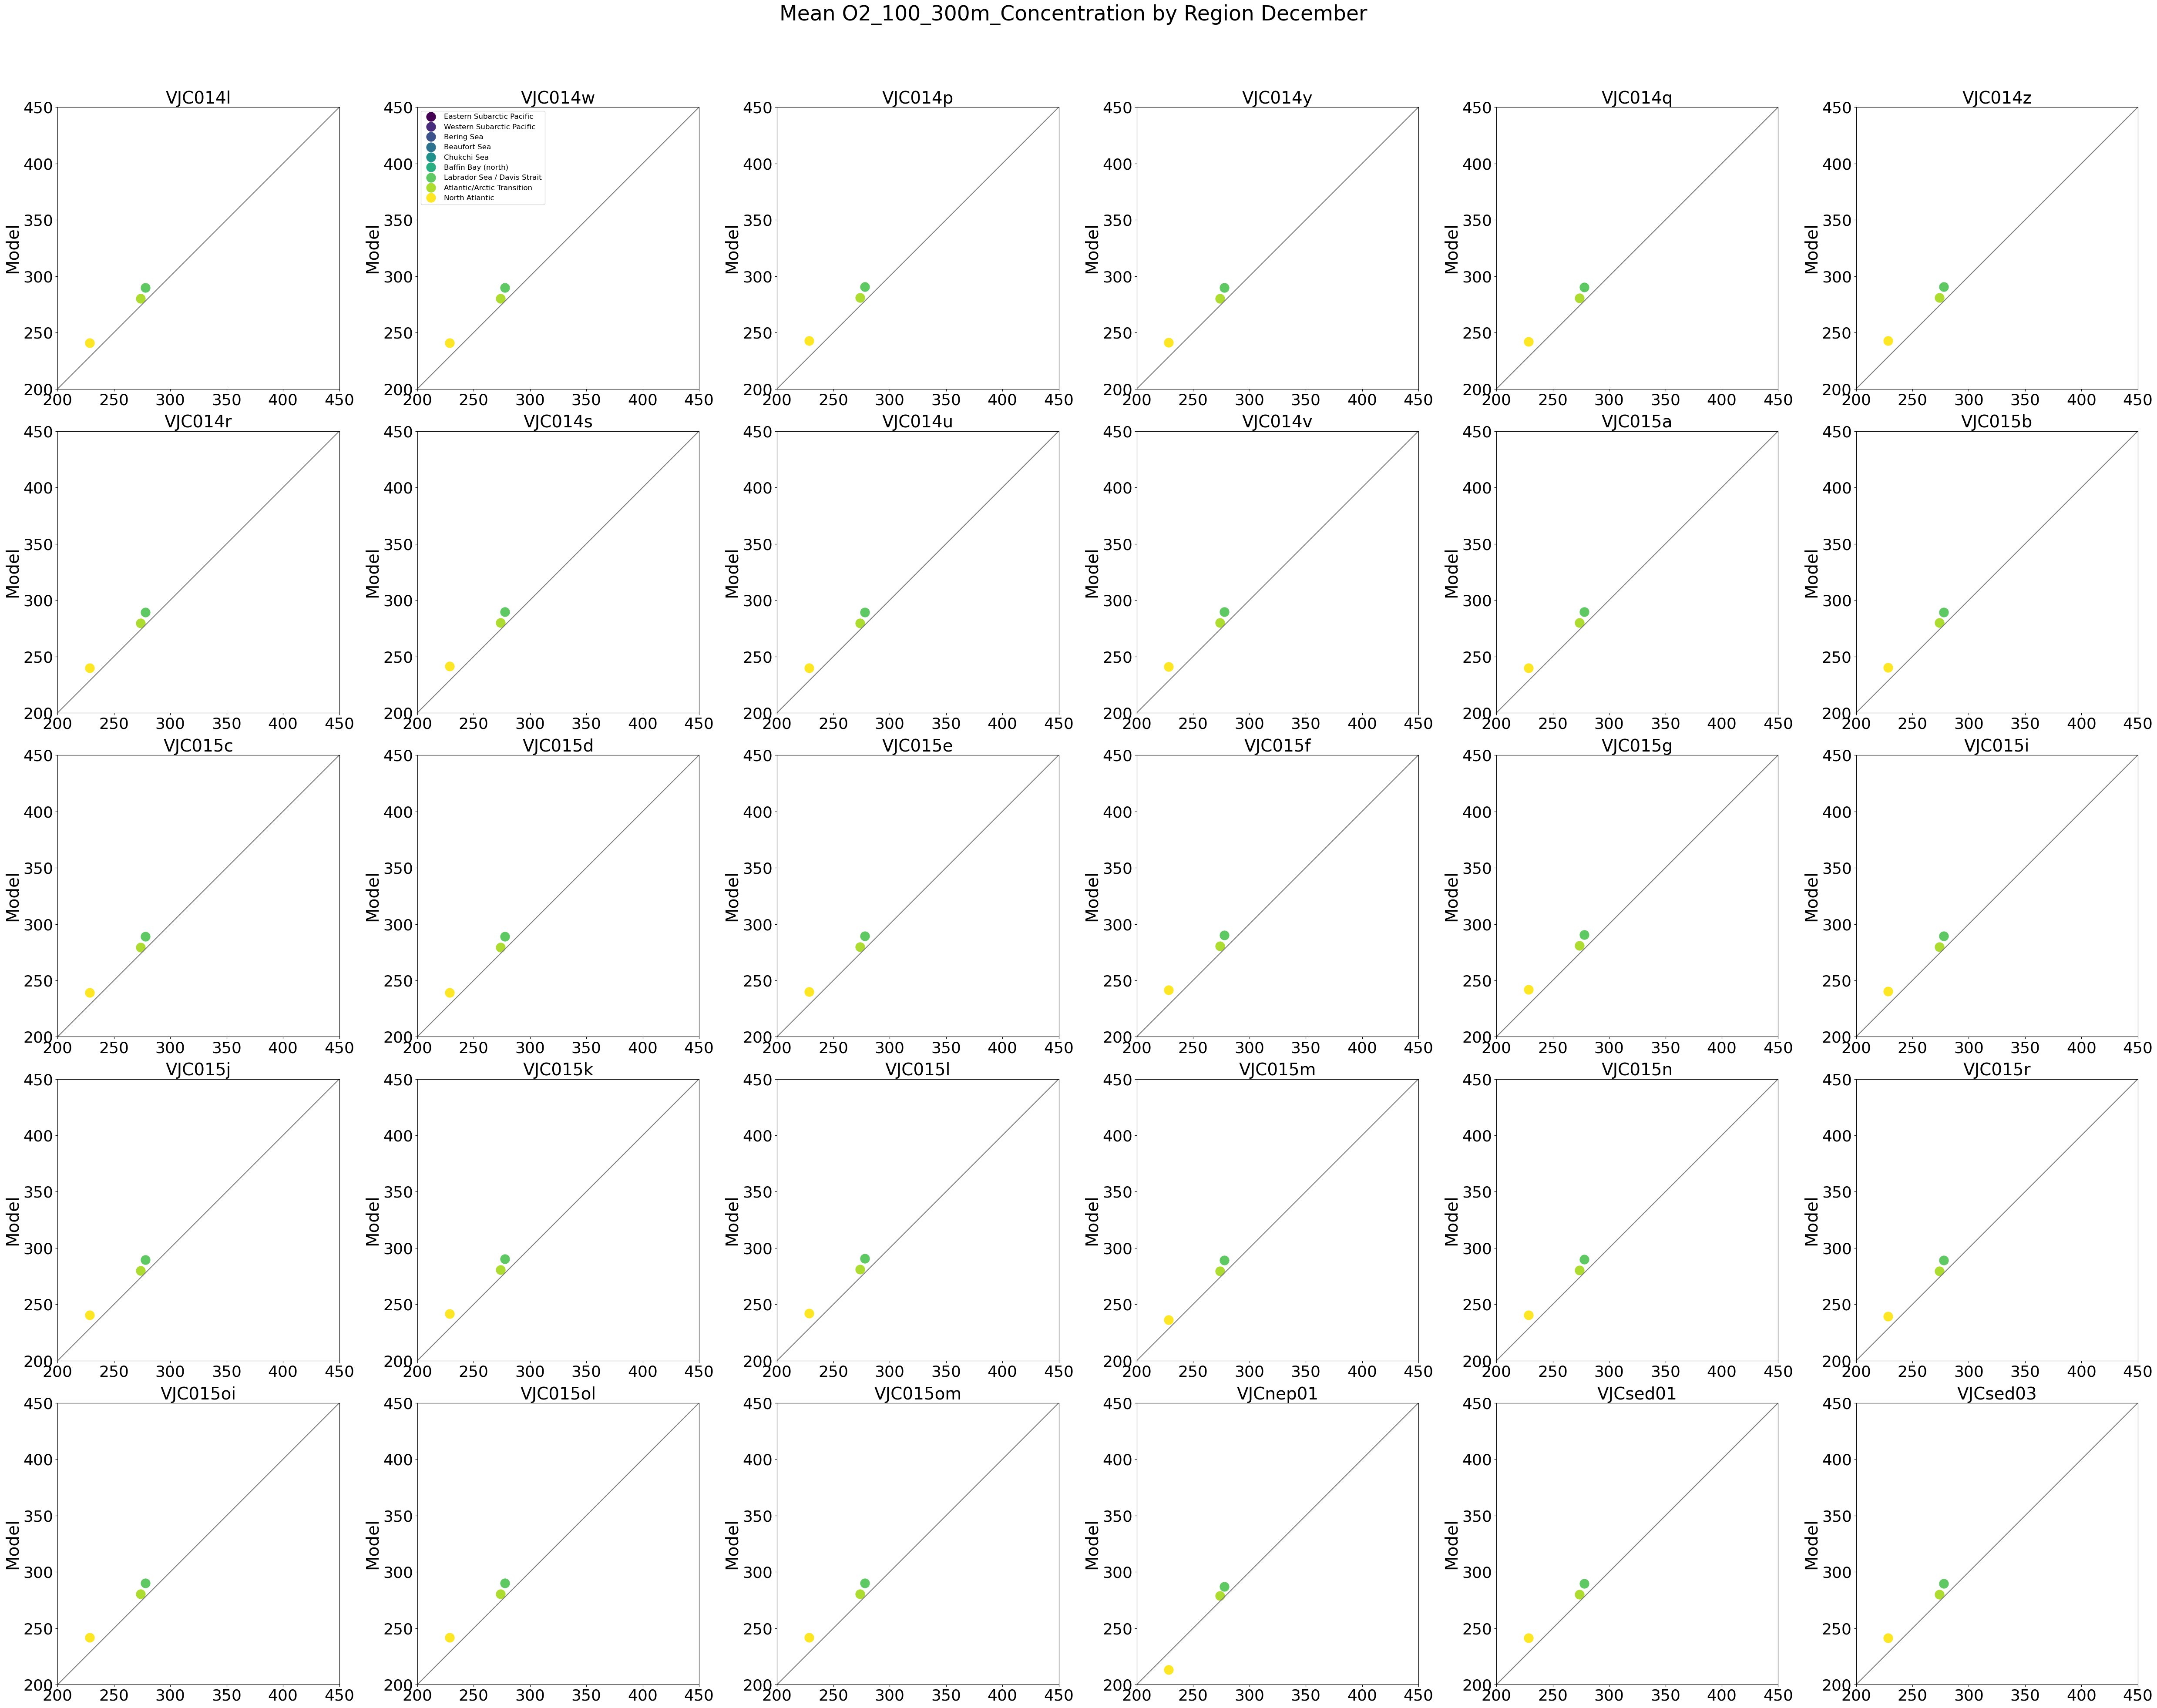

In [4]:
# July

#fig, axes = plt.subplots(num=1, clear=True, nrows=6, ncols=5, figsize=(30, 20))
regions = ['Eastern Subarctic Pacific', 'Western Subarctic Pacific', 'Bering Sea', 'Beaufort Sea', 'Chukchi Sea', 'Baffin Bay (north)', 'Labrador Sea / Davis Strait', 'Atlantic/Arctic Transition', 'North Atlantic']
import itertools
iz = np.arange(25,34) #z level 25 is 108.03m and z level 34 is 300.88m

months=['January','February','March','April','May','June','July','August','September','October','November','December']
regions = ['Eastern Subarctic Pacific', 'Western Subarctic Pacific', 'Bering Sea', 'Beaufort Sea', 'Chukchi Sea', 'Baffin Bay (north)', 'Labrador Sea / Davis Strait', 'Atlantic/Arctic Transition', 'North Atlantic']
variants = ['VJC014l','VJC014w','VJC014p',
            'VJC014y','VJC014q','VJC014z',
            'VJC014r','VJC014s','VJC014u',
            'VJC014v','VJC015a','VJC015b',
            'VJC015c','VJC015d','VJC015e',
            'VJC015f','VJC015g','VJC015i',
            'VJC015j','VJC015k','VJC015l',
            'VJC015m','VJC015n','VJC015r',
            'VJC015oi','VJC015ol','VJC015om',
            'VJCnep01','VJCsed01','VJCsed03']


for im, mmon in enumerate(months):
    
    fig, axes = plt.subplots(num=1, clear=True, nrows=5, ncols=6, figsize=(50, 40))
    fig.suptitle('Mean O2_100_300m_Concentration by Region '+mmon, fontsize=34) 
    
    for a, asuff in enumerate(variants):
        cx=plt.subplot(5,6, a+1)
        runid = str('CREG025_LIM3_CANOE-'+asuff)
        print(runid)
        data_all=np.zeros((12,nz,ny,nx))
        flist = glob.glob("/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/O2/"+runid+"_monthly_O2.nc")
        flist.sort()
        print(flist)
        ifile = 0
        colors =itertools.cycle(plt.get_cmap('viridis')(np.linspace(0,1, 9))) # potential pallettes: hsv, jet, gnuplot
            
        for i, c in enumerate(regions): 
            
            if i >= 0:
                
                #ifile=ifile+1
                print(ifile)
                filein = flist[ifile]
                #print(filein)
                data = Dataset(filein, "r", format="NETCDF4")
                modO2 = data.variables['O2'][:]

                tmaskz=tmask[iz,:,:].flatten()
                ZZ=(np.zeros((10,ny,nx))+regindx).flatten()    # broadcast regions map into a 3D array with same data for each depth
                XOBS=obsO2[im,iz,:,:].squeeze().flatten()
                XMOD=modO2[im,iz,:,:].squeeze().flatten()
                ii=np.where( ~np.isnan(XOBS) )[0]
                XOBS=XOBS[ii]; XMOD=XMOD[ii]; ZZ=ZZ[ii]; tmaskz=tmaskz[ii];
                jj=np.where( (XOBS>0.) & (ZZ==(i+1)) & (tmaskz==1) )[0]                          
              
                XOBS=np.mean(XOBS[jj]); XMOD=np.mean(XMOD[jj])
                
                colour = next(colors) 
                plt.plot(XOBS, XMOD, "o", color=colour, markeredgecolor=colour, markersize=15, label=regions)
                print(filein)

            #if i > 5:
            #    plt.xlabel("Observations", fontsize=18)
            plt.ylabel("Model", fontsize=28)
            plt.title(asuff, fontsize=28)
            plt.xlim([200, 450]); plt.ylim([200,450])
            cx.tick_params(axis='both', labelsize=26)
            cx.set_aspect(1./cx.get_data_ratio())
            if a ==1:
                plt.legend(labels=['Eastern Subarctic Pacific', 'Western Subarctic Pacific', 'Bering Sea', 'Beaufort Sea', 'Chukchi Sea', 'Baffin Bay (north)', 'Labrador Sea / Davis Strait', 'Atlantic/Arctic Transition', 'North Atlantic'],
                           fontsize='large')
        cx.plot([0, 1], [0, 1], color='grey', transform=cx.transAxes)
        
            
    plt.tight_layout(rect=(0,0,1,0.95), w_pad=0)
    plt.show()
    fig.savefig("/home/fid000/WORK7/ANALYSIS/model_evaluation/FIGURES/Means/O2_100-300/O2_deep_month"+str("{:02d}".format(im+1)))